In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
# from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_genie

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 2,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/200 [00:00<?, ?it/s]

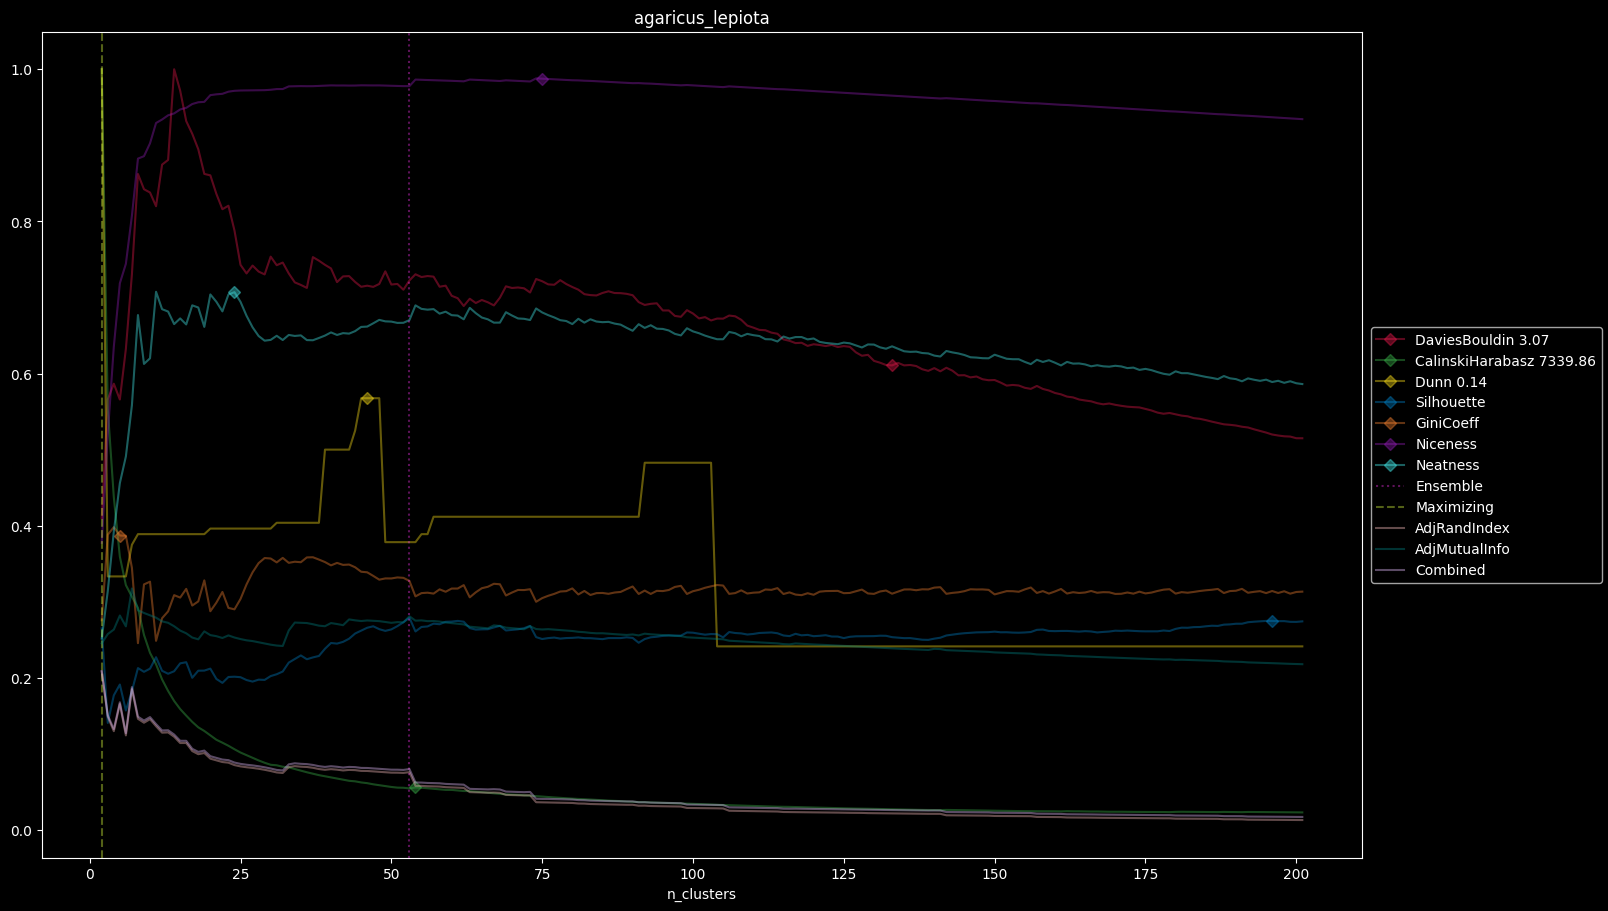

{'Silhouette': 0.26502642719496833, 'Niceness': 0.37746785687872036, 'GiniCoeff': 0.2756916996047431, 'Neatness': 0.25165327864528486, 'sample': {'n_clusters': 2}, 'counts_dict': {473: 1, 1527: 1}, 'DaviesBouldin': 1.2571320536292536, 'CalinskiHarabasz': 7339.859732259465, 'Dunn': 0.14285714285714285, 'AdjRandIndex': 0.20824581387554783, 'AdjMutualInfo': 0.24544445572747195, 'Combined': 0.208985289318082}
0    1038
1     962
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.019879
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

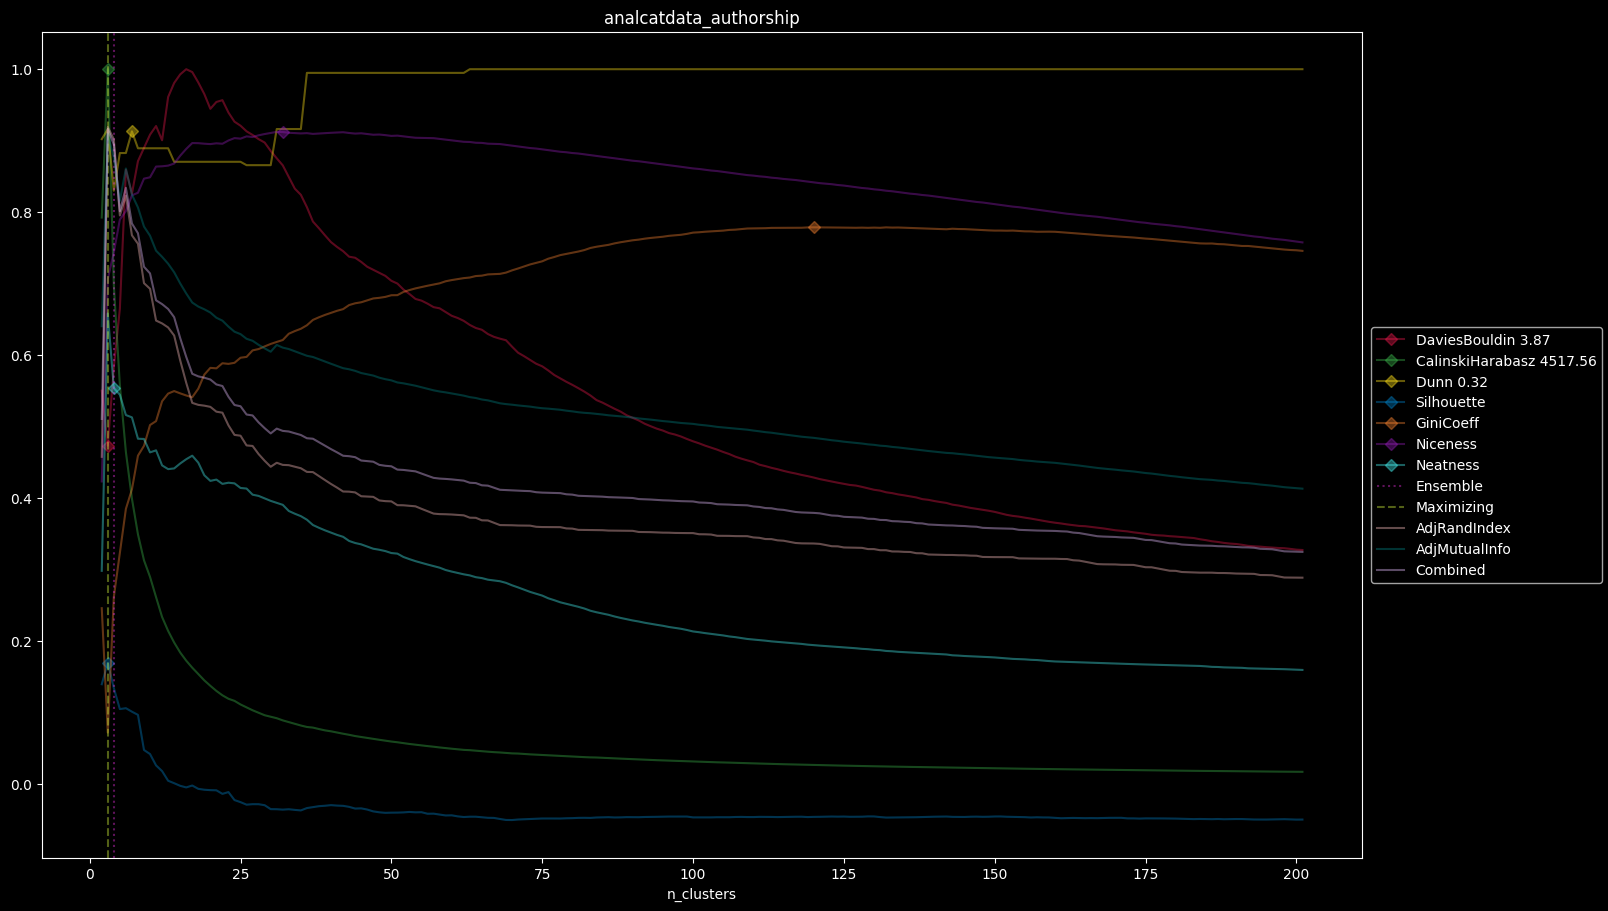

{'Silhouette': 0.16886558860502437, 'Niceness': 0.7062851415837408, 'GiniCoeff': 0.07142857142857142, 'Neatness': 0.6580685939593421, 'sample': {'n_clusters': 3}, 'counts_dict': {228: 1, 301: 1, 312: 1}, 'DaviesBouldin': 1.8307703972410545, 'CalinskiHarabasz': 4517.560591701779, 'Dunn': 0.28900949796472186, 'AdjRandIndex': 0.9190638512713368, 'AdjMutualInfo': 0.9092682207890004, 'Combined': 0.9162244928183891}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

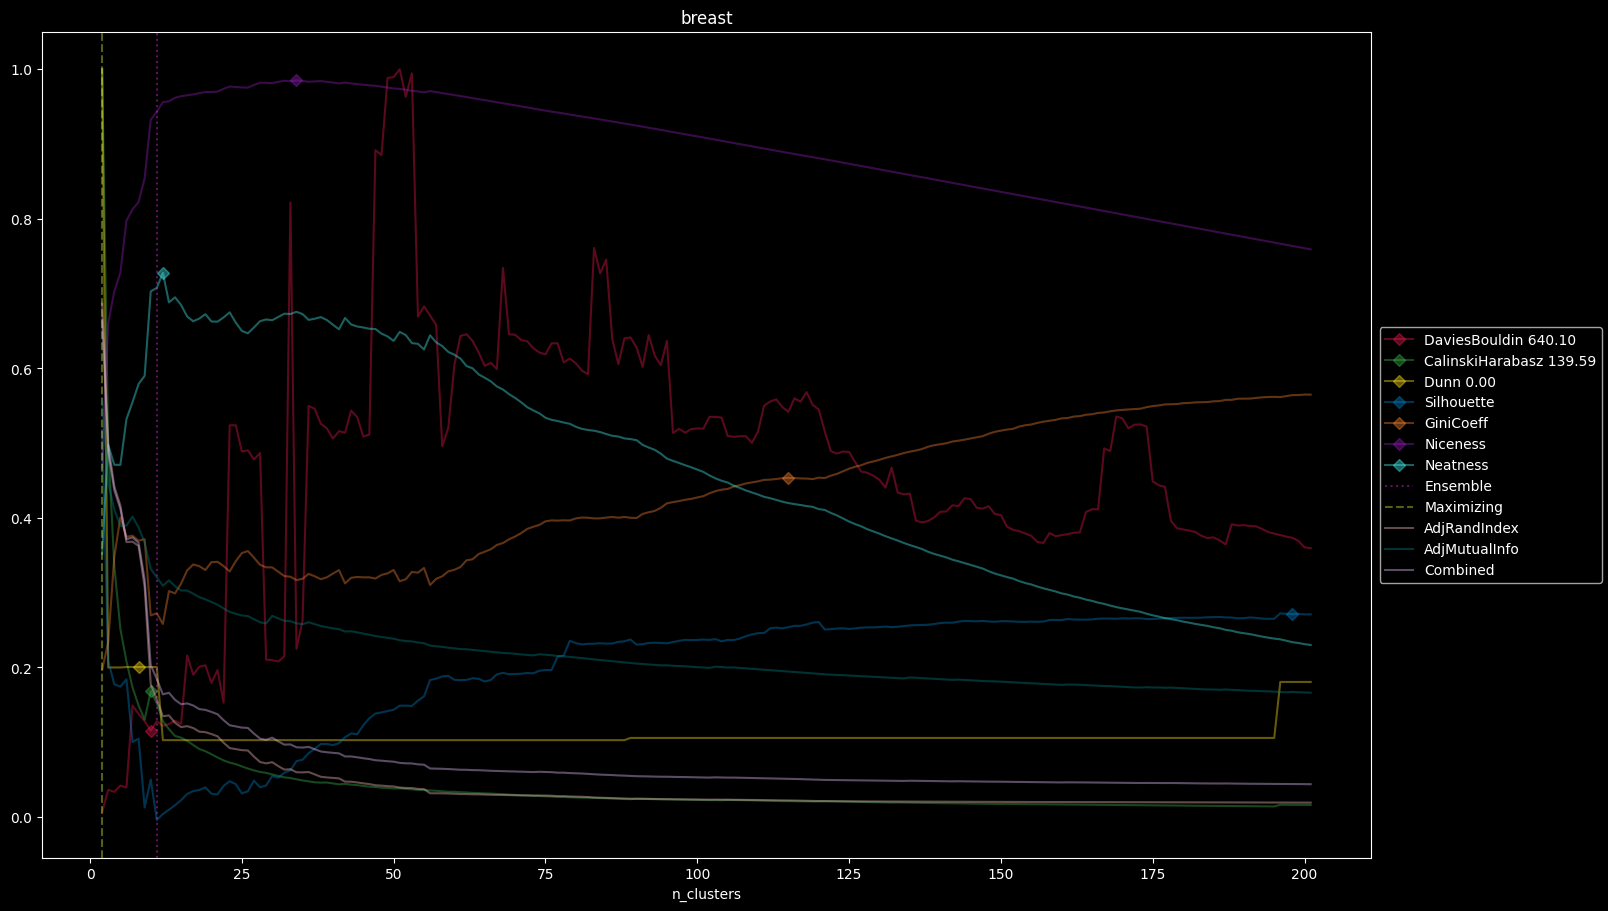

{'Silhouette': 0.5175073617443211, 'Niceness': 0.46687487628464946, 'GiniCoeff': 0.19702823179791976, 'Neatness': 0.3520937877666425, 'sample': {'n_clusters': 2}, 'counts_dict': {222: 1, 477: 1}, 'DaviesBouldin': 4.456541507624763, 'CalinskiHarabasz': 139.5880083422445, 'Dunn': 7.503956648741965e-07, 'AdjRandIndex': 0.6864997159009594, 'AdjMutualInfo': 0.5586712976225562, 'Combined': 0.665067087790209}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

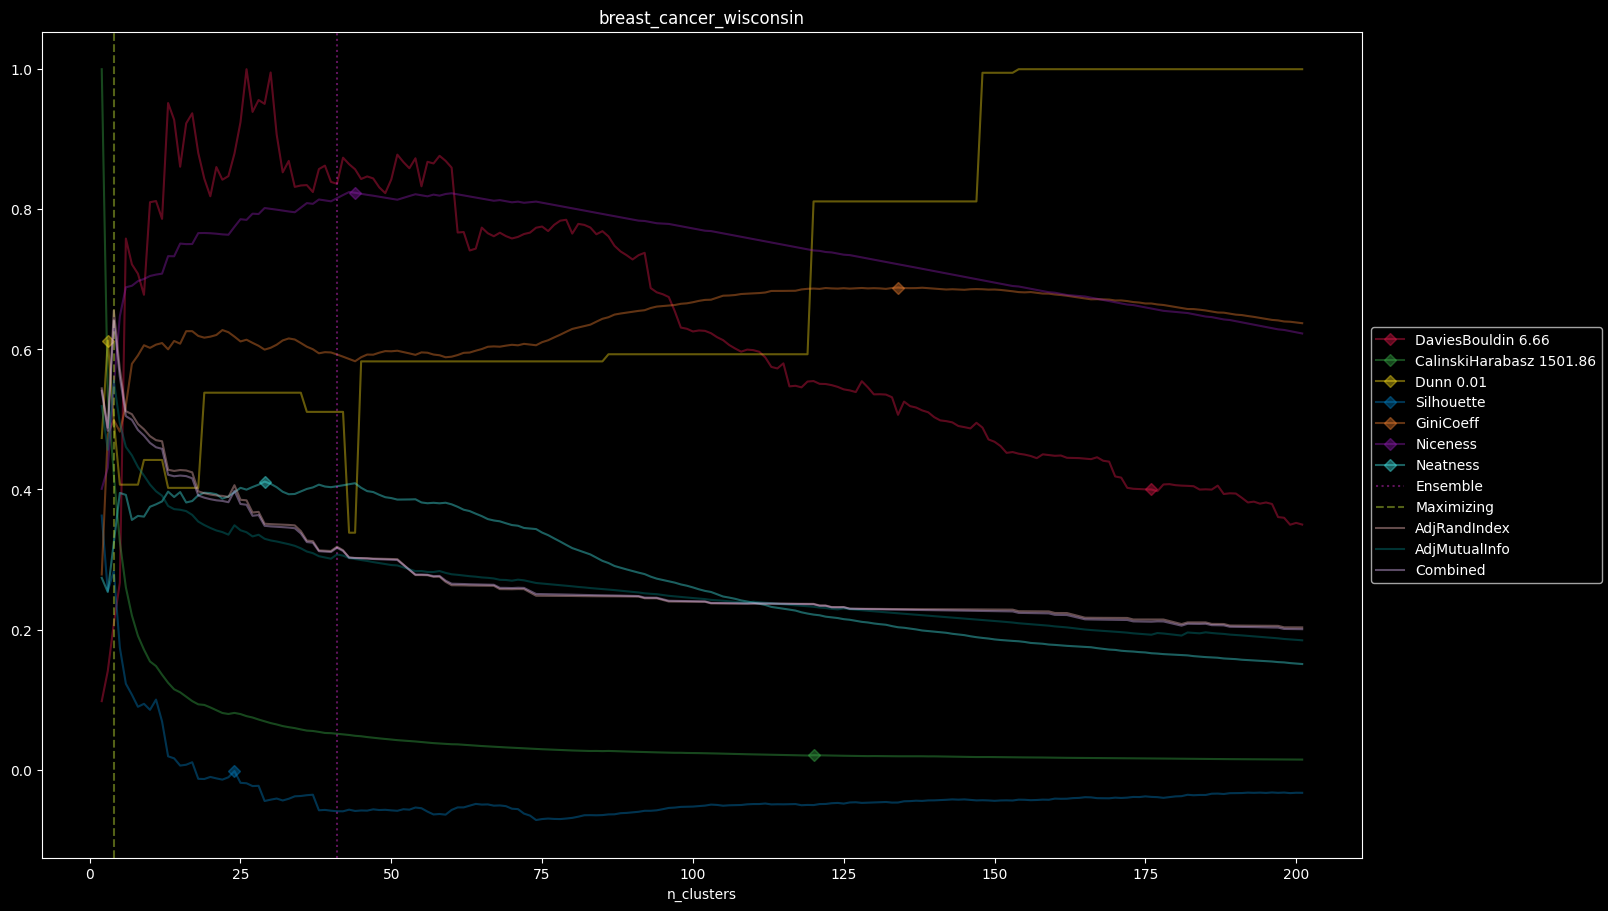

{'Silhouette': 0.283571581901618, 'Niceness': 0.5483369493486412, 'GiniCoeff': 0.4992421220582369, 'Neatness': 0.3240502844149983, 'sample': {'n_clusters': 4}, 'counts_dict': {46: 1, 55: 1, 84: 1, 384: 1}, 'DaviesBouldin': 1.3875049858899247, 'CalinskiHarabasz': 632.61582159318, 'Dunn': 0.004648337474805234, 'AdjRandIndex': 0.6554294940372768, 'AdjMutualInfo': 0.5553194459166633, 'Combined': 0.6415330852833983}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

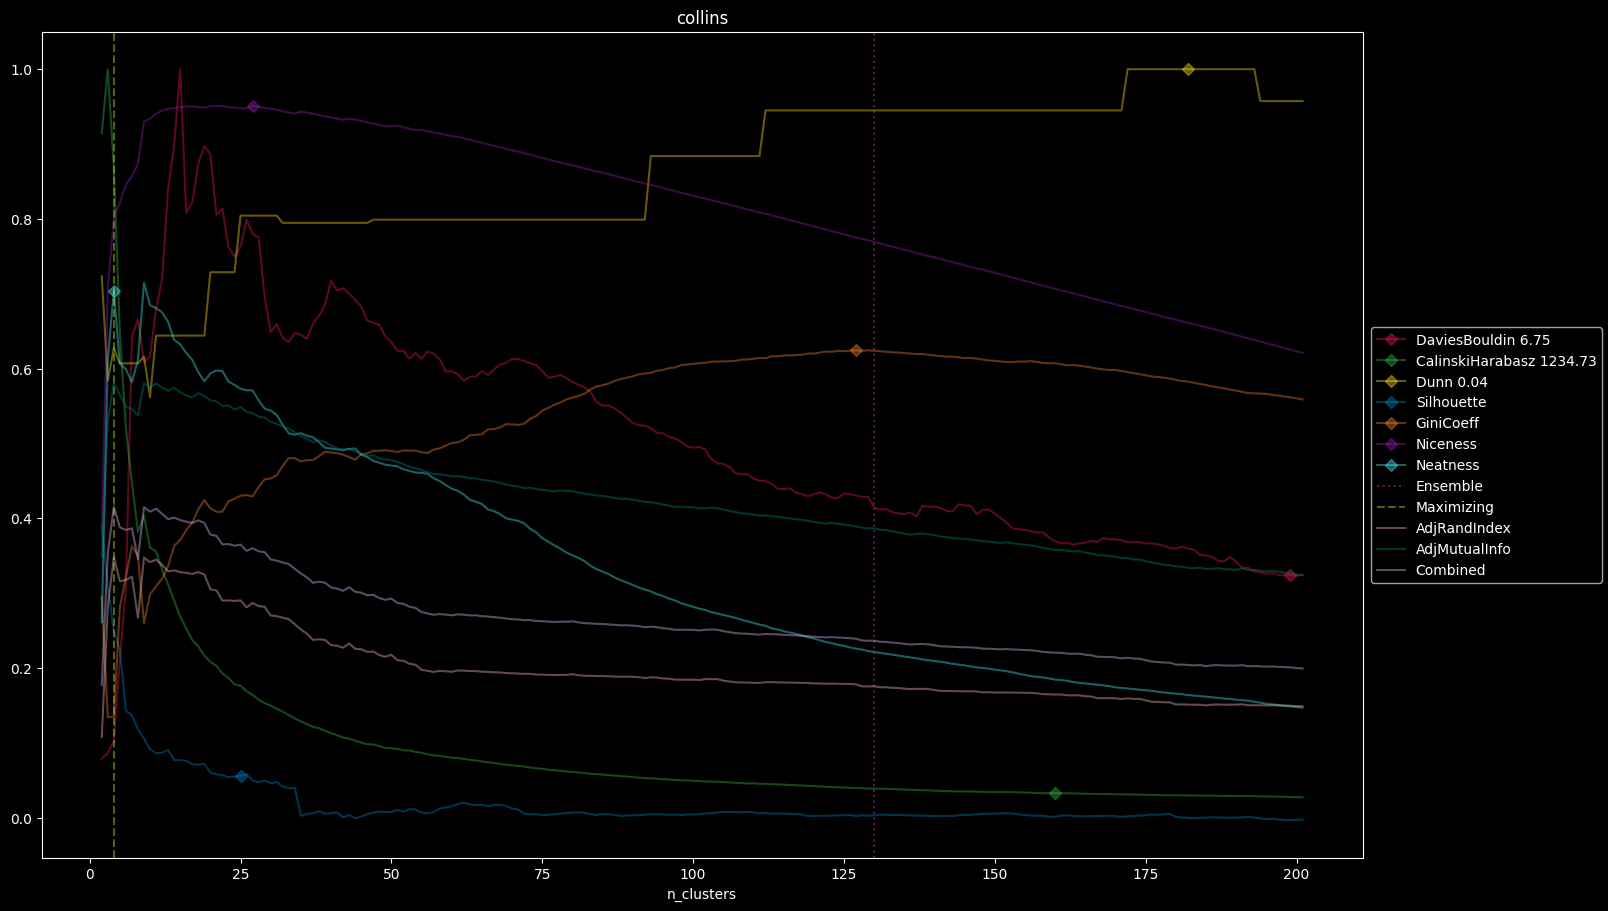

{'Silhouette': 0.2492890480337724, 'Niceness': 0.7995759762018462, 'GiniCoeff': 0.1351948986938188, 'Neatness': 0.7036432123218107, 'sample': {'n_clusters': 4}, 'counts_dict': {94: 1, 107: 1, 112: 1, 172: 1}, 'DaviesBouldin': 0.6877371049475672, 'CalinskiHarabasz': 1071.772805814228, 'Dunn': 0.025910658702784563, 'AdjRandIndex': 0.34839135309880703, 'AdjMutualInfo': 0.5809514059197094, 'Combined': 0.41558407716323276}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/71 [00:00<?, ?it/s]

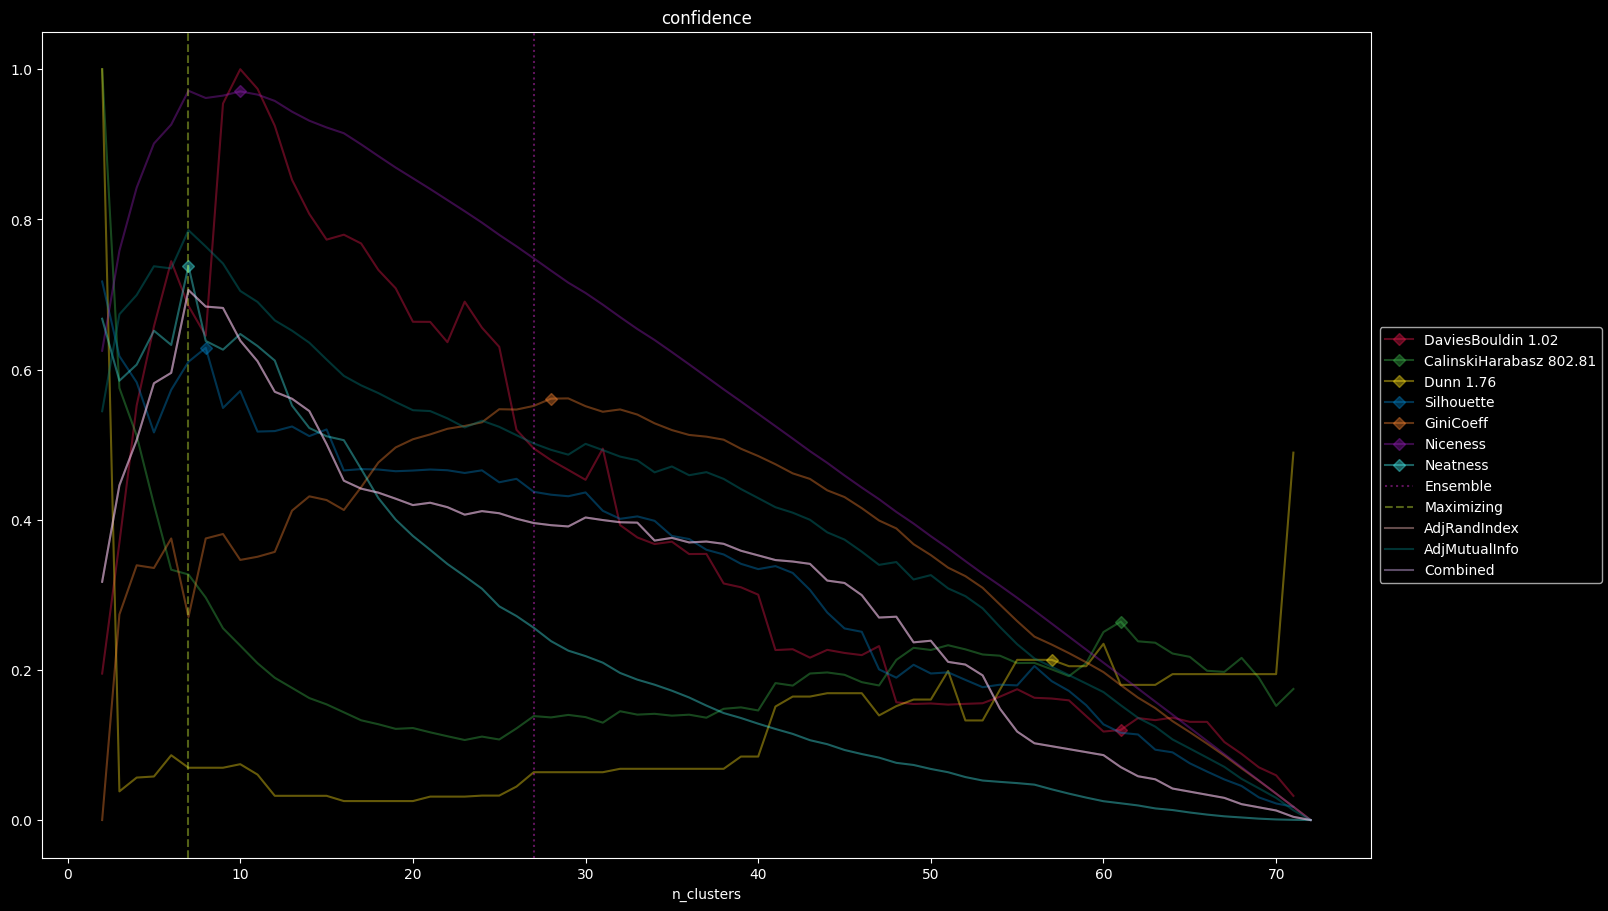

{'Silhouette': 0.610318052943524, 'Niceness': 0.9712921626984127, 'GiniCoeff': 0.27040816326530615, 'Neatness': 0.7379022884707599, 'sample': {'n_clusters': 7}, 'counts_dict': {5: 1, 7: 2, 11: 1, 12: 1, 13: 1, 17: 1}, 'DaviesBouldin': 0.6989139278660221, 'CalinskiHarabasz': 262.54660348975875, 'Dunn': 0.12294332723948813, 'AdjRandIndex': 0.705919836869942, 'AdjMutualInfo': 0.7854977985333296, 'Combined': 0.705919836869942}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

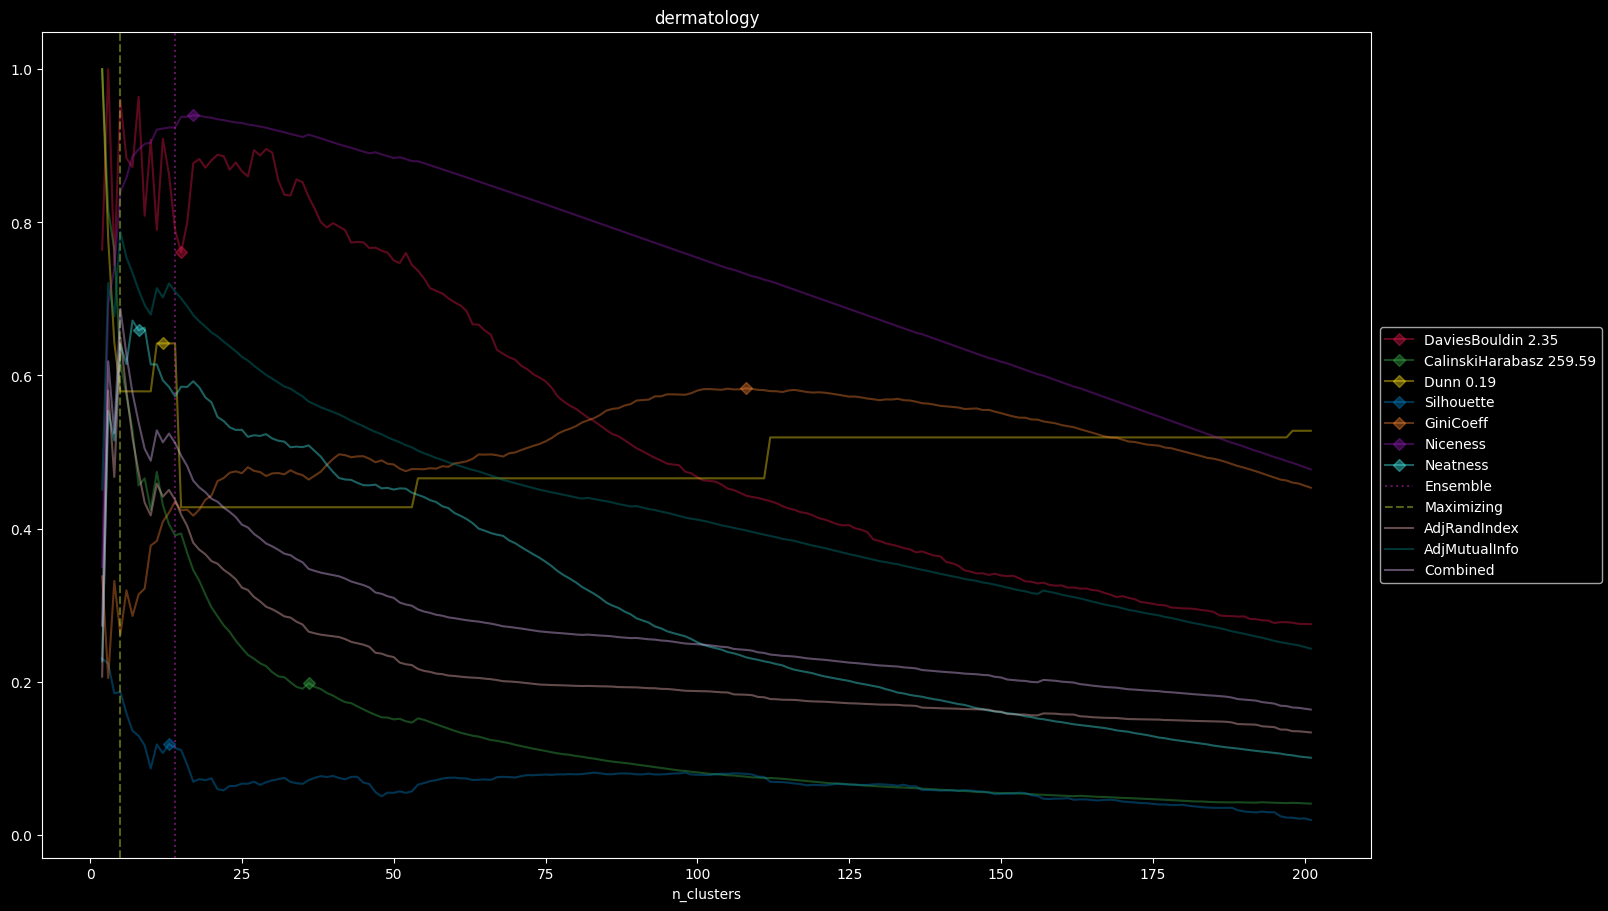

{'Silhouette': 0.1865314109031315, 'Niceness': 0.8399204959582827, 'GiniCoeff': 0.2616074287544028, 'Neatness': 0.6402318050128035, 'sample': {'n_clusters': 5}, 'counts_dict': {33: 1, 51: 1, 72: 1, 88: 1, 122: 1}, 'DaviesBouldin': 2.2534966913443806, 'CalinskiHarabasz': 160.07593623688203, 'Dunn': 0.10975609756097561, 'AdjRandIndex': 0.6494169337634004, 'AdjMutualInfo': 0.7876175450908889, 'Combined': 0.6871127030287859}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

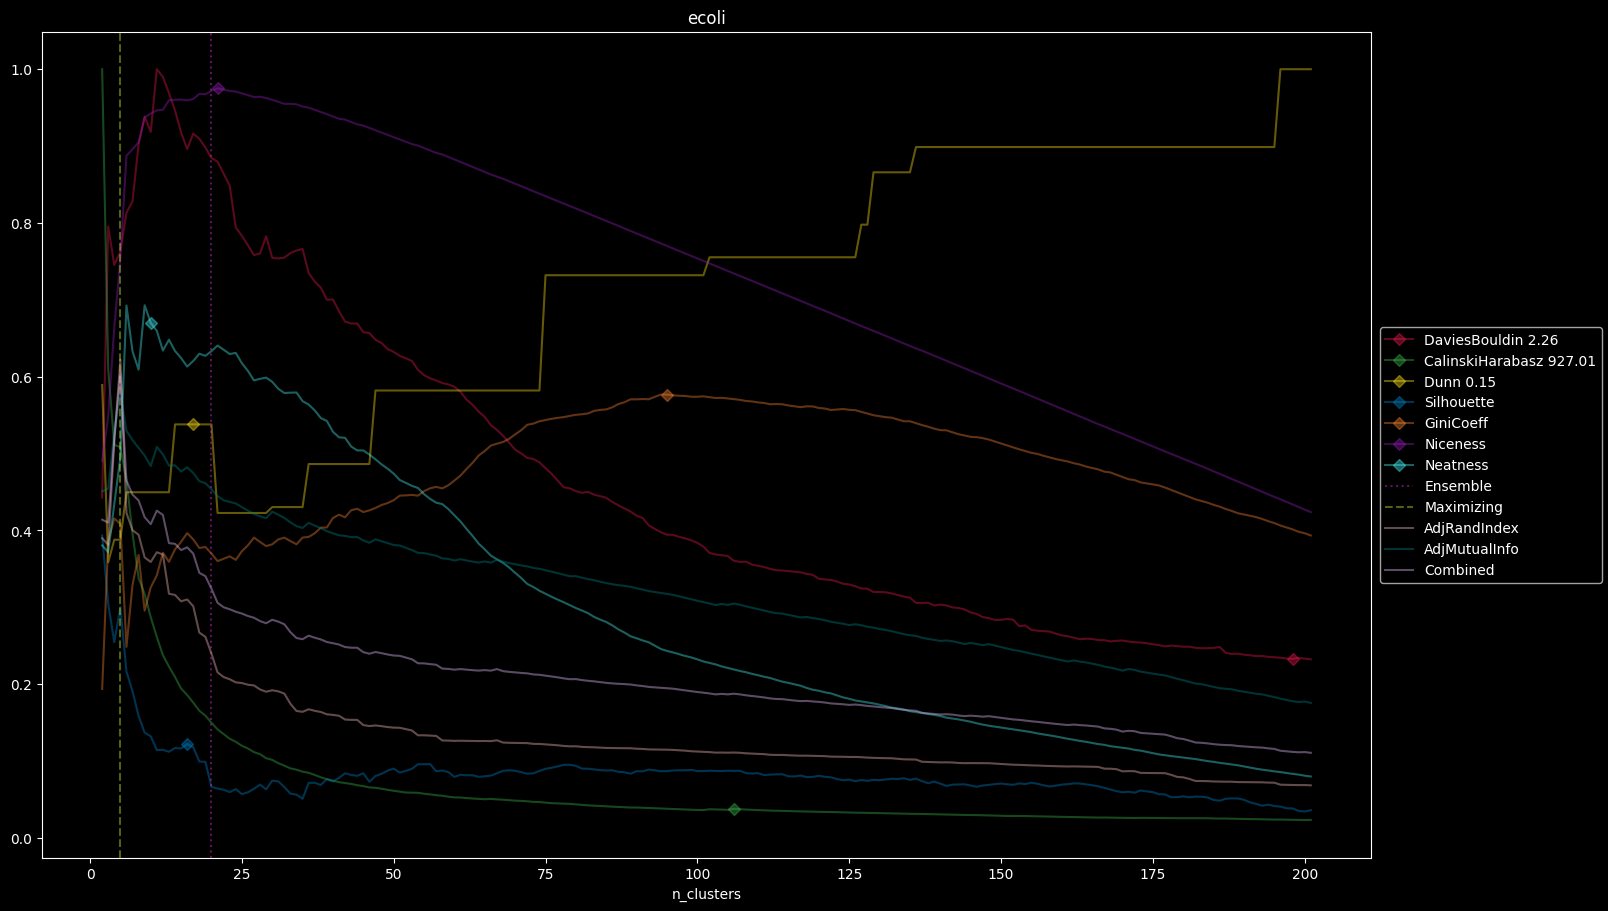

{'Silhouette': 0.30002114231104354, 'Niceness': 0.7532226742698866, 'GiniCoeff': 0.40845231296402057, 'Neatness': 0.4953333463544684, 'sample': {'n_clusters': 5}, 'counts_dict': {27: 1, 30: 1, 51: 1, 56: 1, 163: 1}, 'DaviesBouldin': 1.7242879345741986, 'CalinskiHarabasz': 471.2216873732411, 'Dunn': 0.06008583690987125, 'AdjRandIndex': 0.6222377411996277, 'AdjMutualInfo': 0.5784256022706337, 'Combined': 0.6049430807611806}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

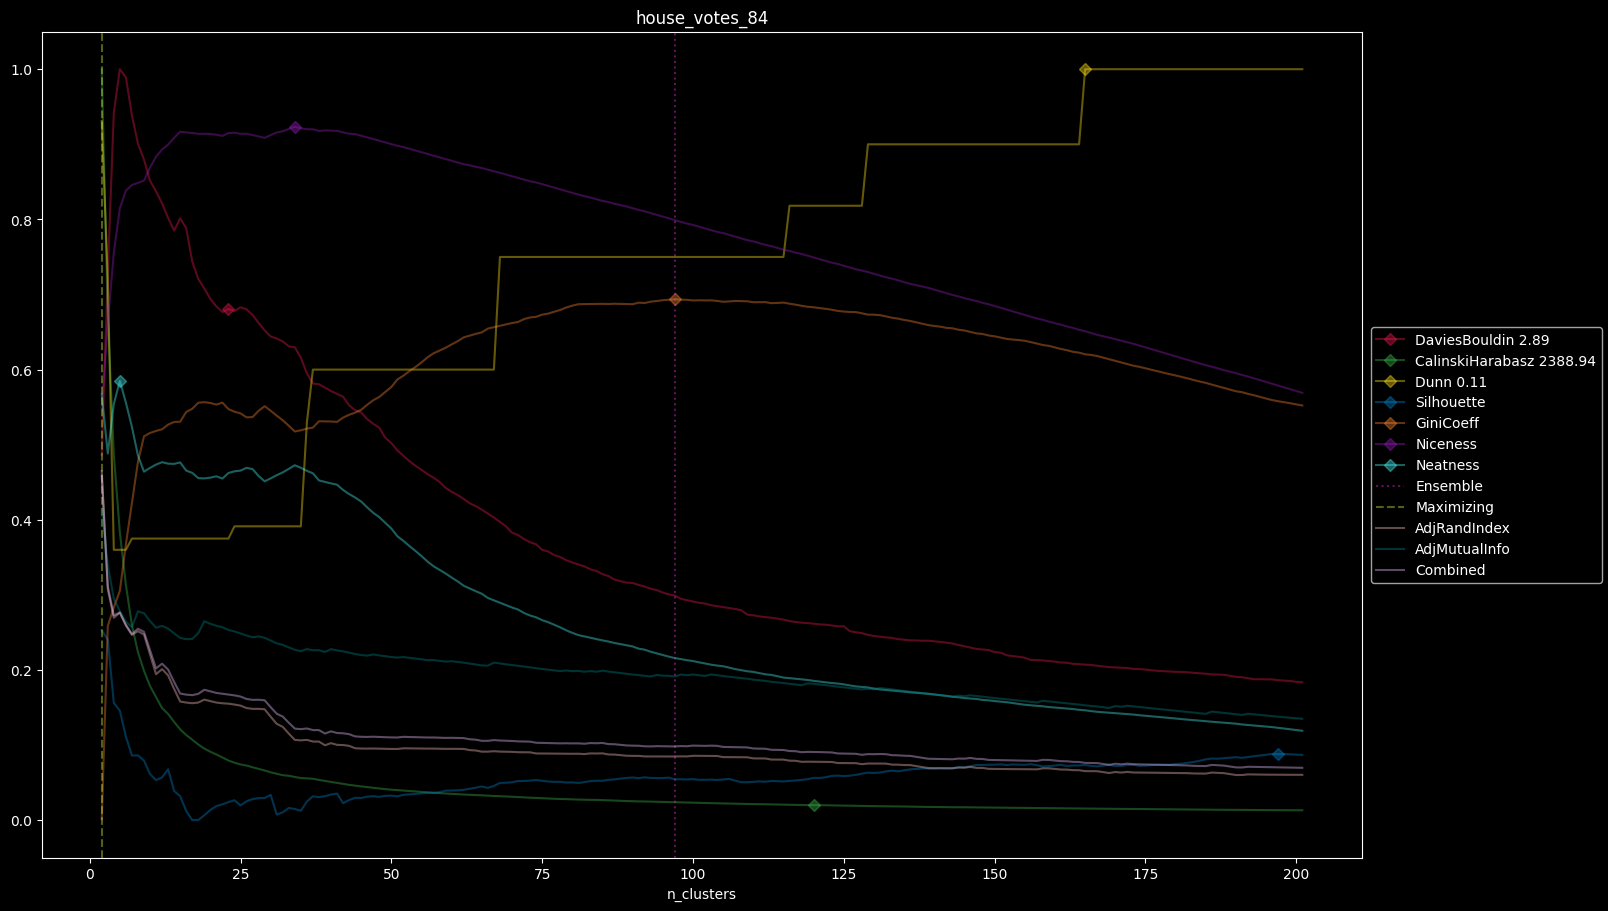

{'Silhouette': 0.2527752792576815, 'Niceness': 0.5491043594603934, 'GiniCoeff': 0.0012681159420289854, 'Neatness': 0.5668507536115813, 'sample': {'n_clusters': 2}, 'counts_dict': {217: 1, 218: 1}, 'DaviesBouldin': 1.404674139555726, 'CalinskiHarabasz': 2388.938106173693, 'Dunn': 0.10344827586206896, 'AdjRandIndex': 0.4649903030469501, 'AdjMutualInfo': 0.4134068568068083, 'Combined': 0.4585143377852801}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/149 [00:00<?, ?it/s]

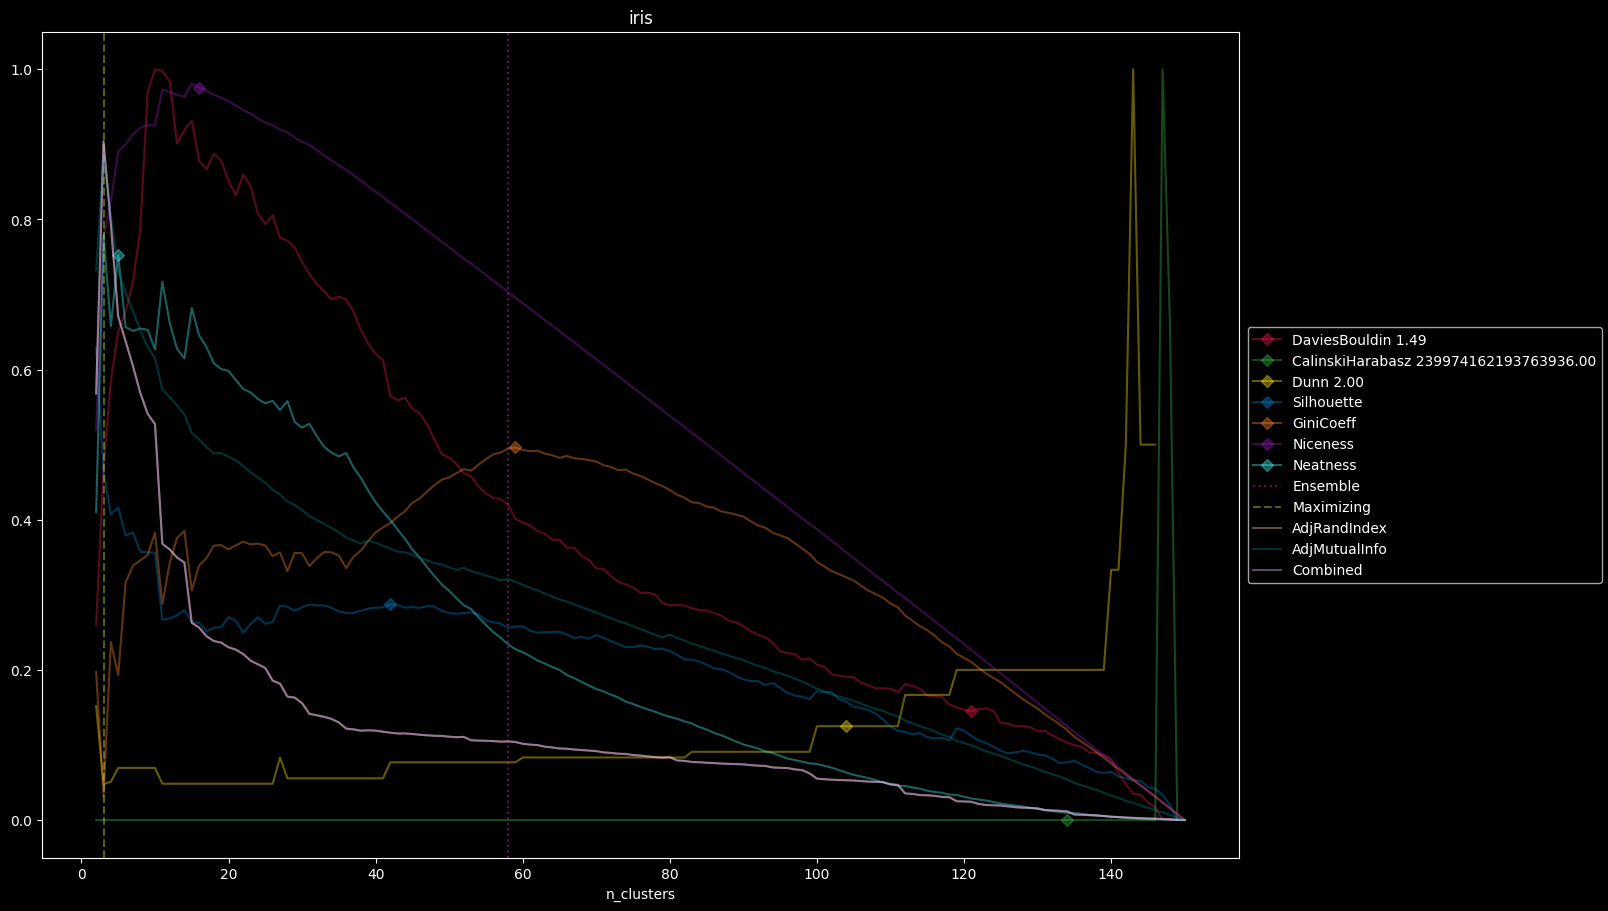

{'Silhouette': 0.46351186731507976, 'Niceness': 0.77388647834942, 'GiniCoeff': 0.03162055335968379, 'Neatness': 0.7791916779325675, 'sample': {'n_clusters': 3}, 'counts_dict': {47: 1, 50: 1, 53: 1}, 'DaviesBouldin': 0.7000525354128716, 'CalinskiHarabasz': 544.9288280716286, 'Dunn': 0.09615384615384606, 'AdjRandIndex': 0.9037675791580496, 'AdjMutualInfo': 0.8836227970842698, 'Combined': 0.9037675791580496}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

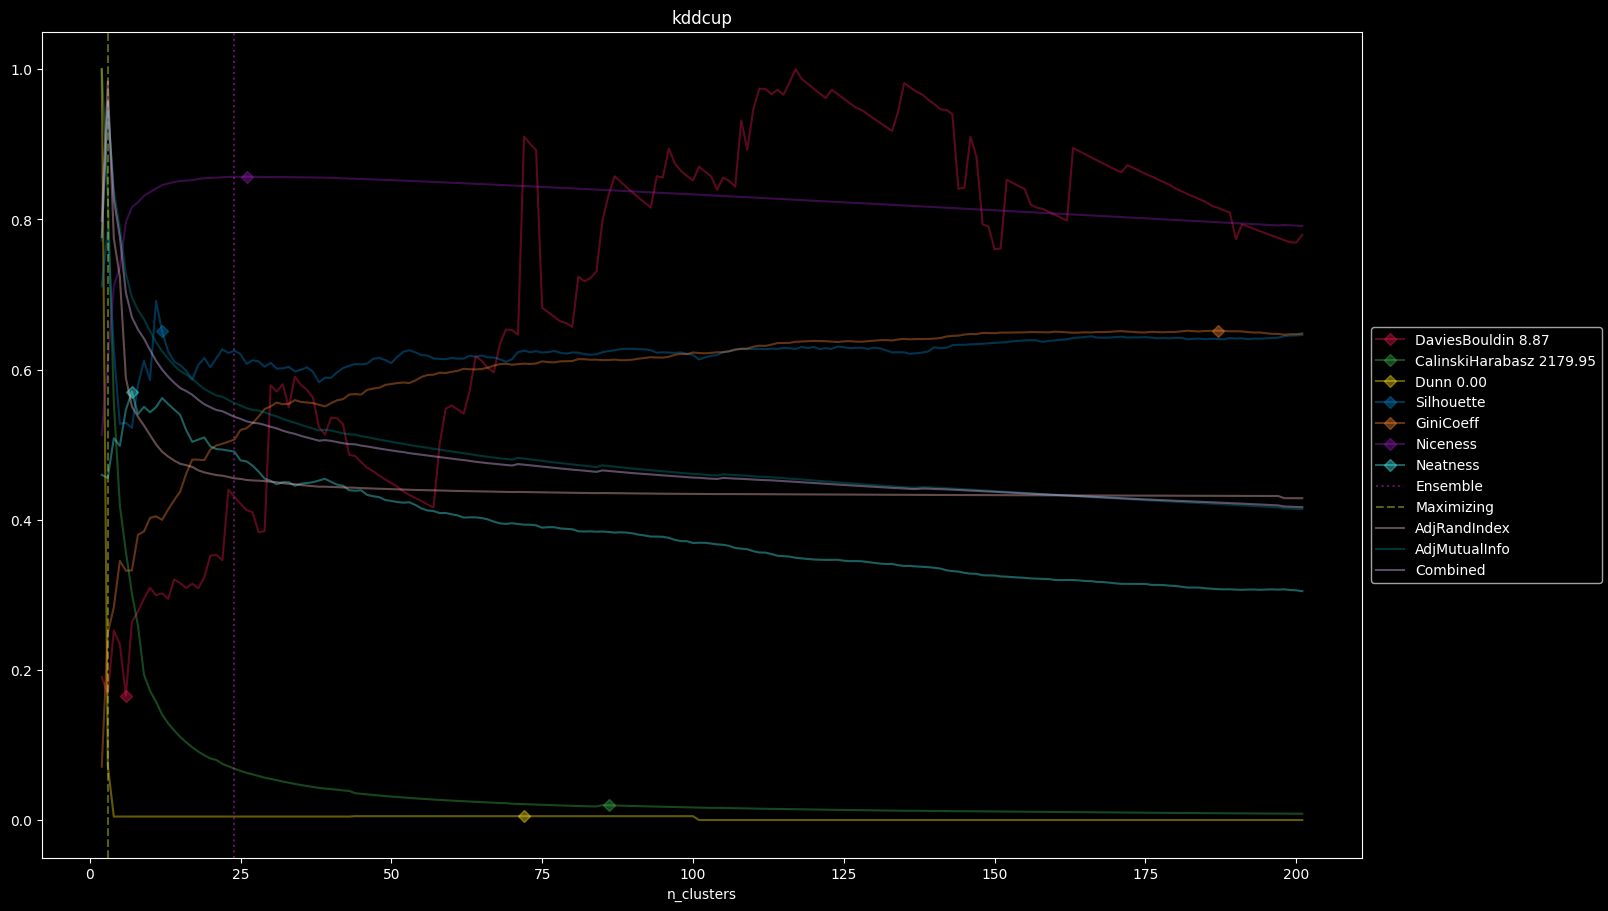

{'Silhouette': 0.7859904112156719, 'Niceness': 0.6101205209044676, 'GiniCoeff': 0.2490118577075099, 'Neatness': 0.4556719681895473, 'sample': {'n_clusters': 3}, 'counts_dict': {422: 1, 442: 1, 1136: 1}, 'DaviesBouldin': 1.4875437463221193, 'CalinskiHarabasz': 1817.74296625713, 'Dunn': 1.6276816281632085e-05, 'AdjRandIndex': 0.9835245707252891, 'AdjMutualInfo': 0.9504732898580703, 'Combined': 0.9565046194297795}
18    1137
9      434
11     394
0        9
17       7
5        5
15       4
20       4
21       4
10       1
14       1
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     41.000000
k     11.000000
e      1.076621
g      0.817516
Name: kddcup, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

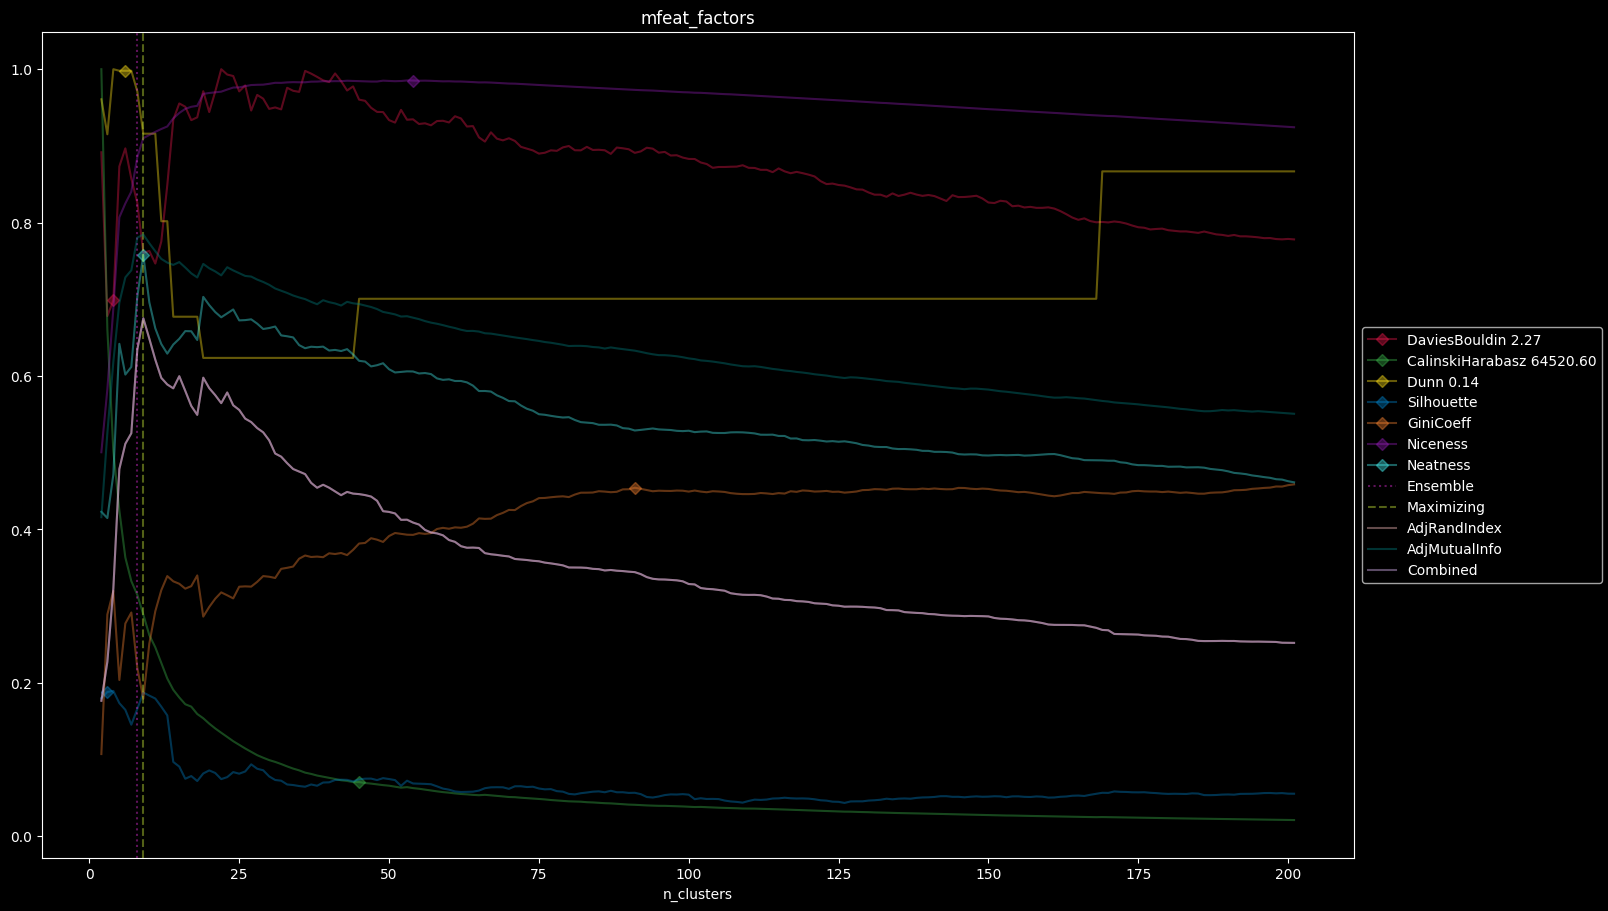

{'Silhouette': 0.18748526786556532, 'Niceness': 0.910155299223451, 'GiniCoeff': 0.17937688909555918, 'Neatness': 0.7578476942625323, 'sample': {'n_clusters': 9}, 'counts_dict': {155: 1, 170: 1, 179: 1, 182: 1, 186: 1, 194: 1, 202: 1, 313: 1, 419: 1}, 'DaviesBouldin': 1.7269410082766279, 'CalinskiHarabasz': 18650.12999547552, 'Dunn': 0.12443007543728757, 'AdjRandIndex': 0.675374305375047, 'AdjMutualInfo': 0.7844272151778554, 'Combined': 0.675374305375047}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

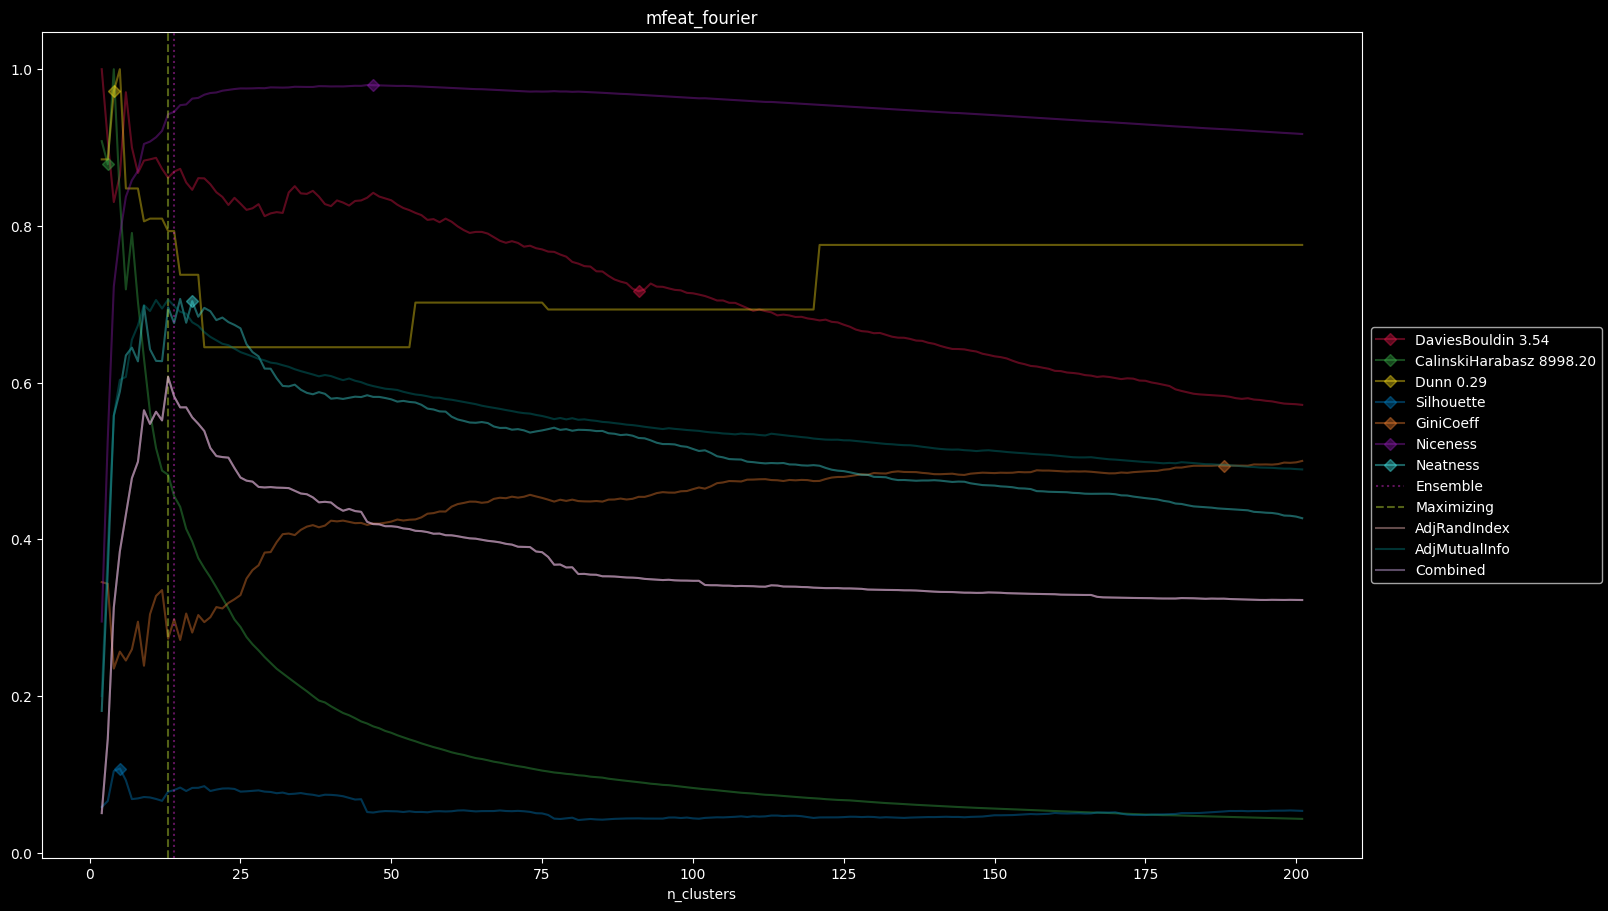

{'Silhouette': 0.07767115921822156, 'Niceness': 0.9424349063302747, 'GiniCoeff': 0.27299554665283565, 'Neatness': 0.696013145907924, 'sample': {'n_clusters': 13}, 'counts_dict': {60: 1, 64: 1, 65: 1, 96: 1, 103: 1, 153: 1, 158: 1, 164: 1, 180: 1, 200: 1, 208: 1, 271: 1, 278: 1}, 'DaviesBouldin': 3.0509297743903576, 'CalinskiHarabasz': 4339.532305093358, 'Dunn': 0.23134284762846904, 'AdjRandIndex': 0.6072111543593002, 'AdjMutualInfo': 0.7059797631370638, 'Combined': 0.6072111543593002}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

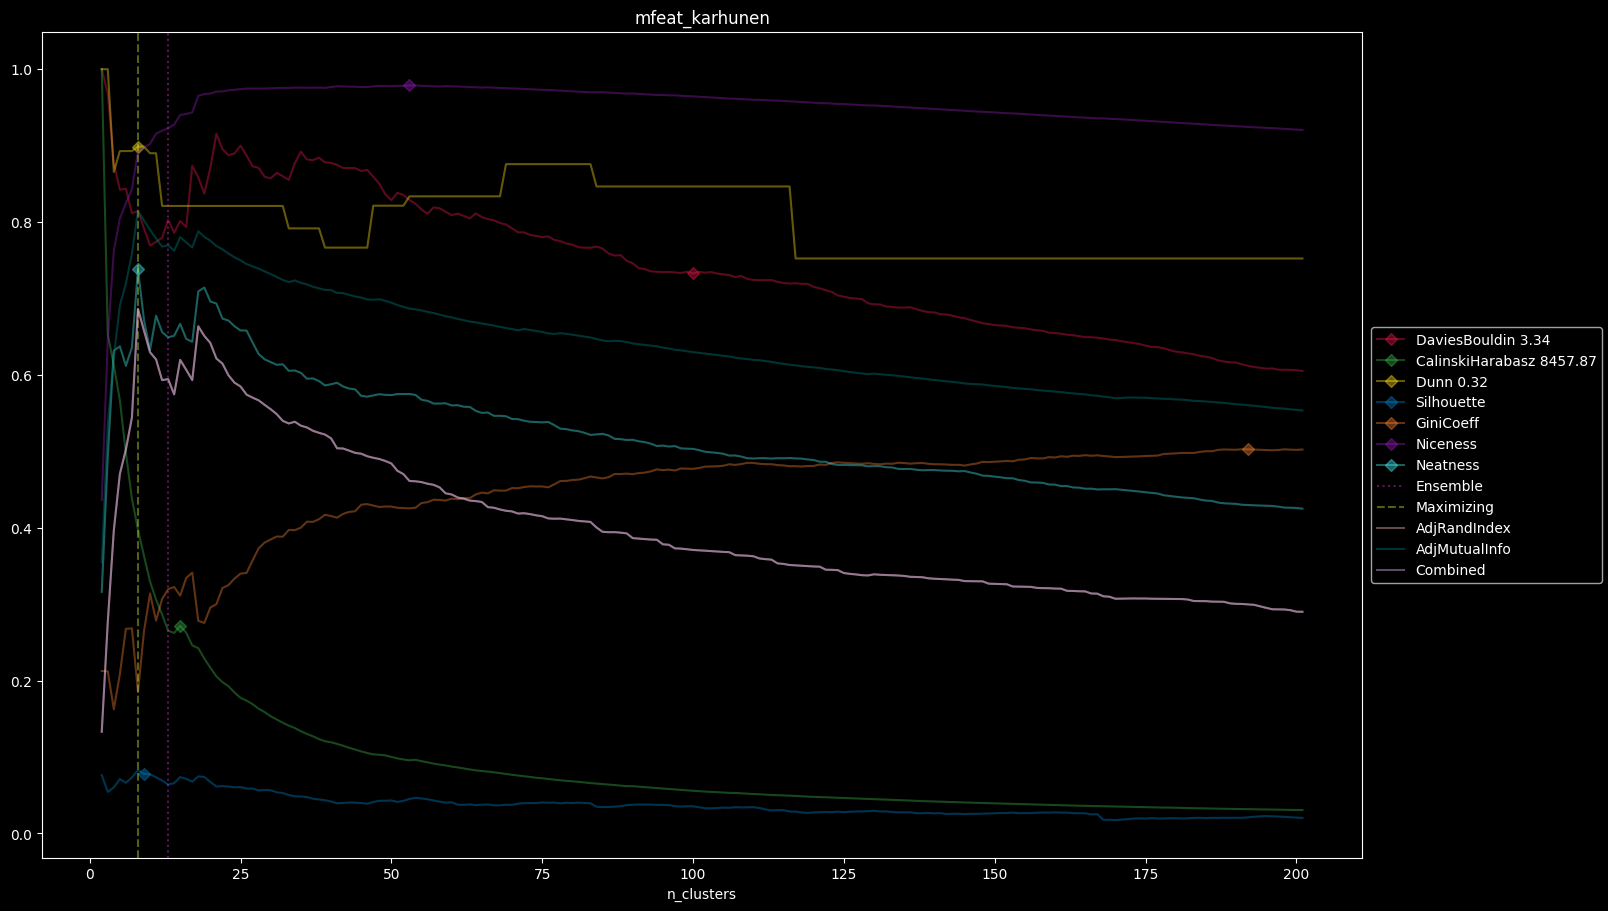

{'Silhouette': 0.08278789662527018, 'Niceness': 0.8927515976072037, 'GiniCoeff': 0.1851894908160893, 'Neatness': 0.738088169019987, 'sample': {'n_clusters': 8}, 'counts_dict': {180: 1, 187: 1, 199: 1, 203: 1, 212: 1, 215: 1, 329: 1, 475: 1}, 'DaviesBouldin': 2.722091900917129, 'CalinskiHarabasz': 3361.986695322353, 'Dunn': 0.2895803393607698, 'AdjRandIndex': 0.6863605702392002, 'AdjMutualInfo': 0.8144576902421033, 'Combined': 0.6863605702392002}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

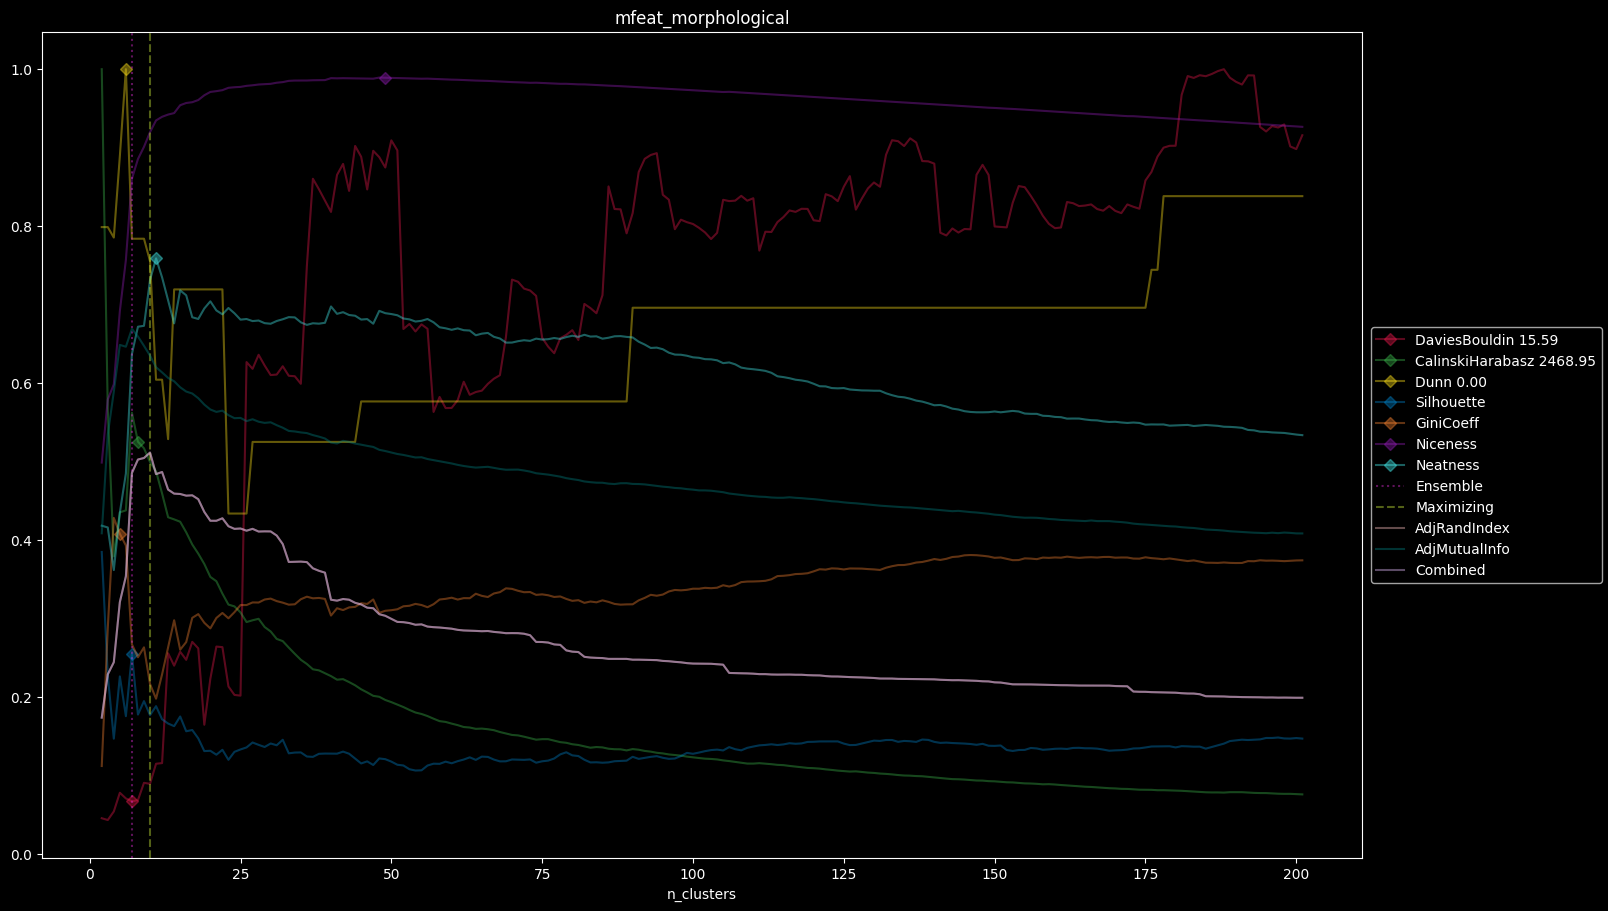

{'Silhouette': 0.17676367984973956, 'Niceness': 0.9197848003070284, 'GiniCoeff': 0.21647291327598234, 'Neatness': 0.7312107992609277, 'sample': {'n_clusters': 10}, 'counts_dict': {107: 1, 125: 1, 139: 1, 172: 1, 185: 1, 189: 1, 199: 2, 287: 1, 398: 1}, 'DaviesBouldin': 1.3914769382181094, 'CalinskiHarabasz': 1232.9378604806782, 'Dunn': 0.00021739725685665588, 'AdjRandIndex': 0.5114157619755603, 'AdjMutualInfo': 0.6350079880555106, 'Combined': 0.5114157619755603}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

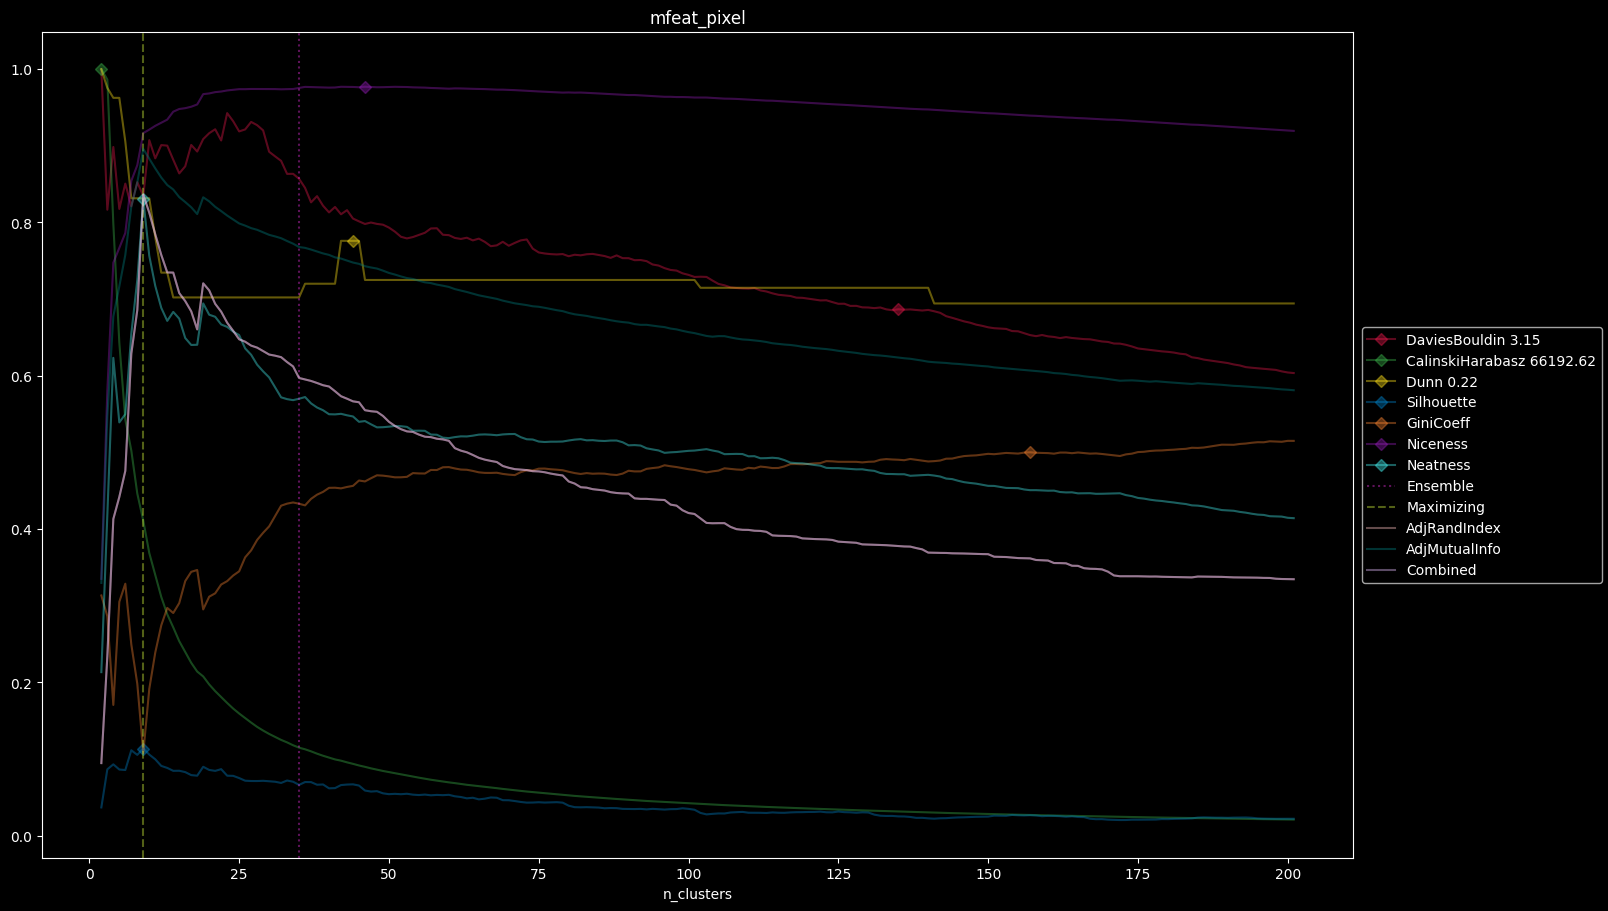

{'Silhouette': 0.1136566930931913, 'Niceness': 0.9166463202213962, 'GiniCoeff': 0.10788188793303882, 'Neatness': 0.8302858407074905, 'sample': {'n_clusters': 9}, 'counts_dict': {191: 1, 193: 1, 196: 1, 197: 1, 198: 1, 204: 1, 205: 1, 218: 1, 398: 1}, 'DaviesBouldin': 2.626619694429102, 'CalinskiHarabasz': 27205.511272282885, 'Dunn': 0.18614270941054809, 'AdjRandIndex': 0.8362619244610533, 'AdjMutualInfo': 0.8959376323695075, 'Combined': 0.8362619244610533}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

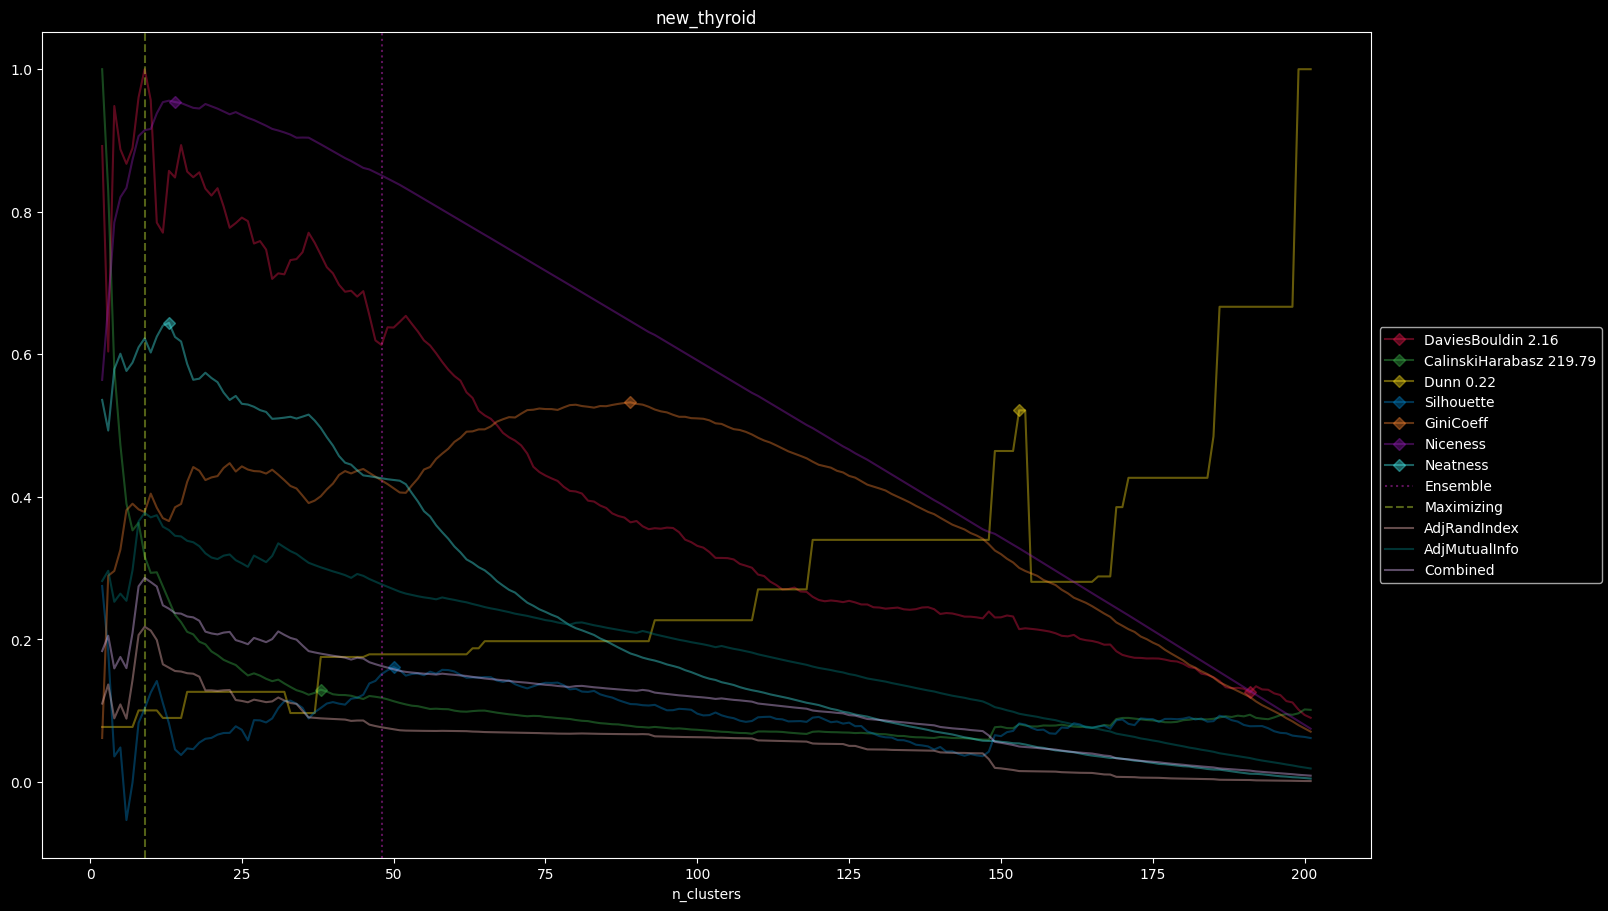

{'Silhouette': 0.1026911667086492, 'Niceness': 0.9144413537320353, 'GiniCoeff': 0.37857142857142856, 'Neatness': 0.6224182683011376, 'sample': {'n_clusters': 9}, 'counts_dict': {11: 3, 16: 1, 22: 1, 23: 1, 24: 1, 26: 1, 71: 1}, 'DaviesBouldin': 2.1596708630325034, 'CalinskiHarabasz': 69.57765653232744, 'Dunn': 0.02193995381062356, 'AdjRandIndex': 0.21768225021993956, 'AdjMutualInfo': 0.3774139151852413, 'Combined': 0.2861386780622117}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

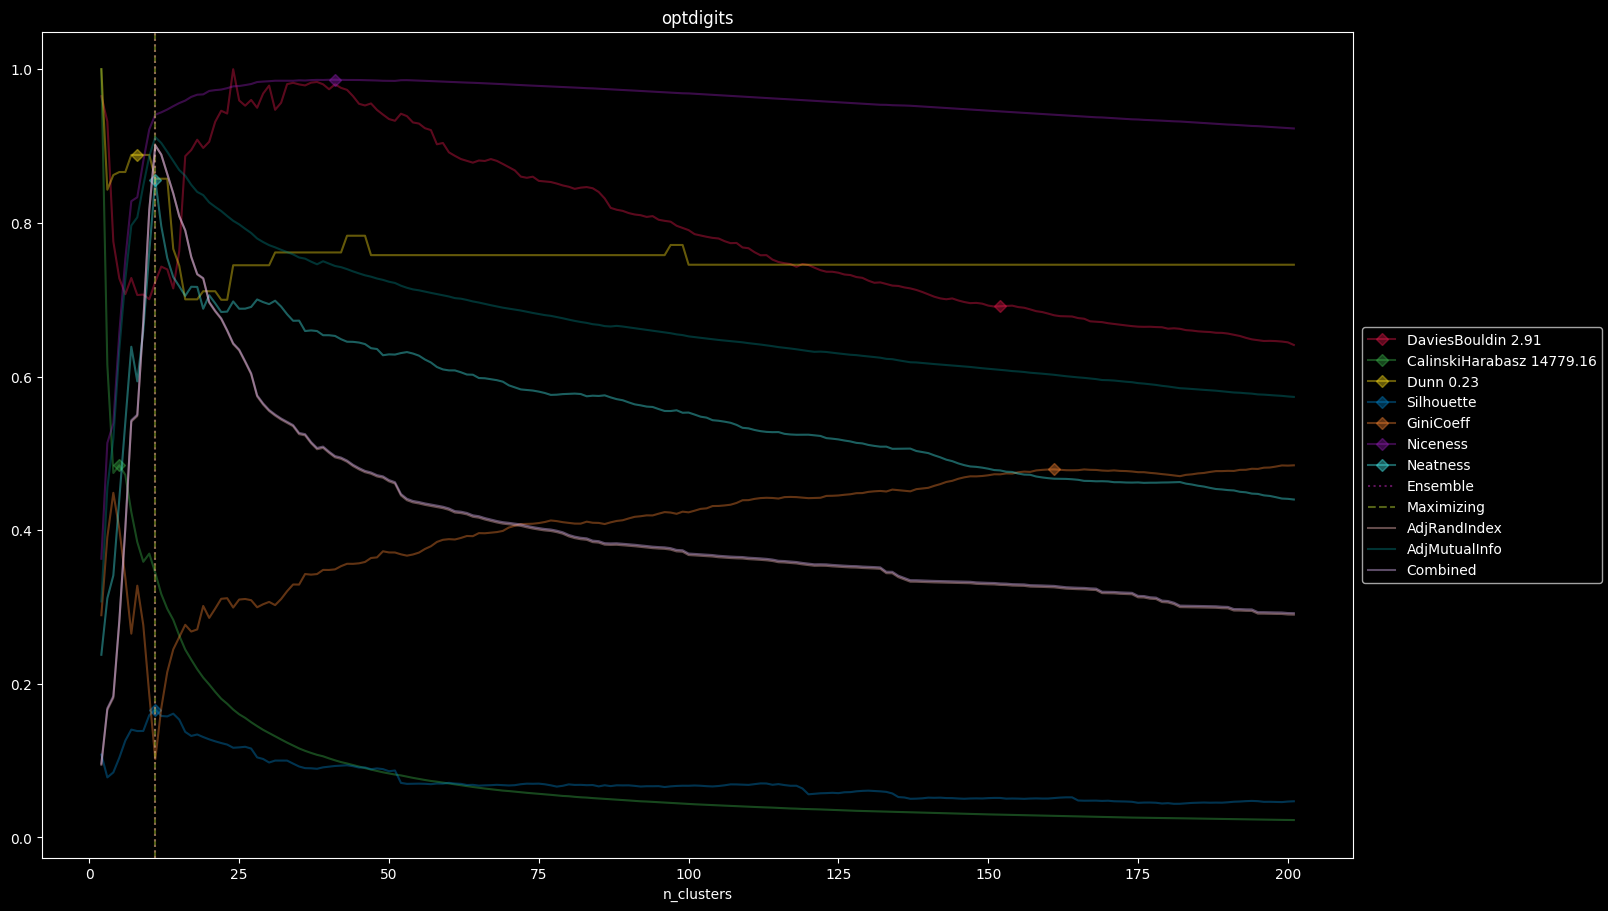

{'Silhouette': 0.1664948645625132, 'Niceness': 0.9408181129961214, 'GiniCoeff': 0.10186848724398131, 'Neatness': 0.8559381026185243, 'sample': {'n_clusters': 11}, 'counts_dict': {57: 1, 153: 1, 187: 1, 194: 3, 196: 1, 199: 1, 203: 1, 207: 1, 216: 1}, 'DaviesBouldin': 2.10427628129599, 'CalinskiHarabasz': 5088.964193154967, 'Dunn': 0.1939252336448598, 'AdjRandIndex': 0.9008529731773964, 'AdjMutualInfo': 0.9115811875653598, 'Combined': 0.9009270554762391}
3    204
1    203
4    202
7    201
9    200
5    199
6    199
2    198
8    197
0    197
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302518
g      0.006905
Name: optdigits, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

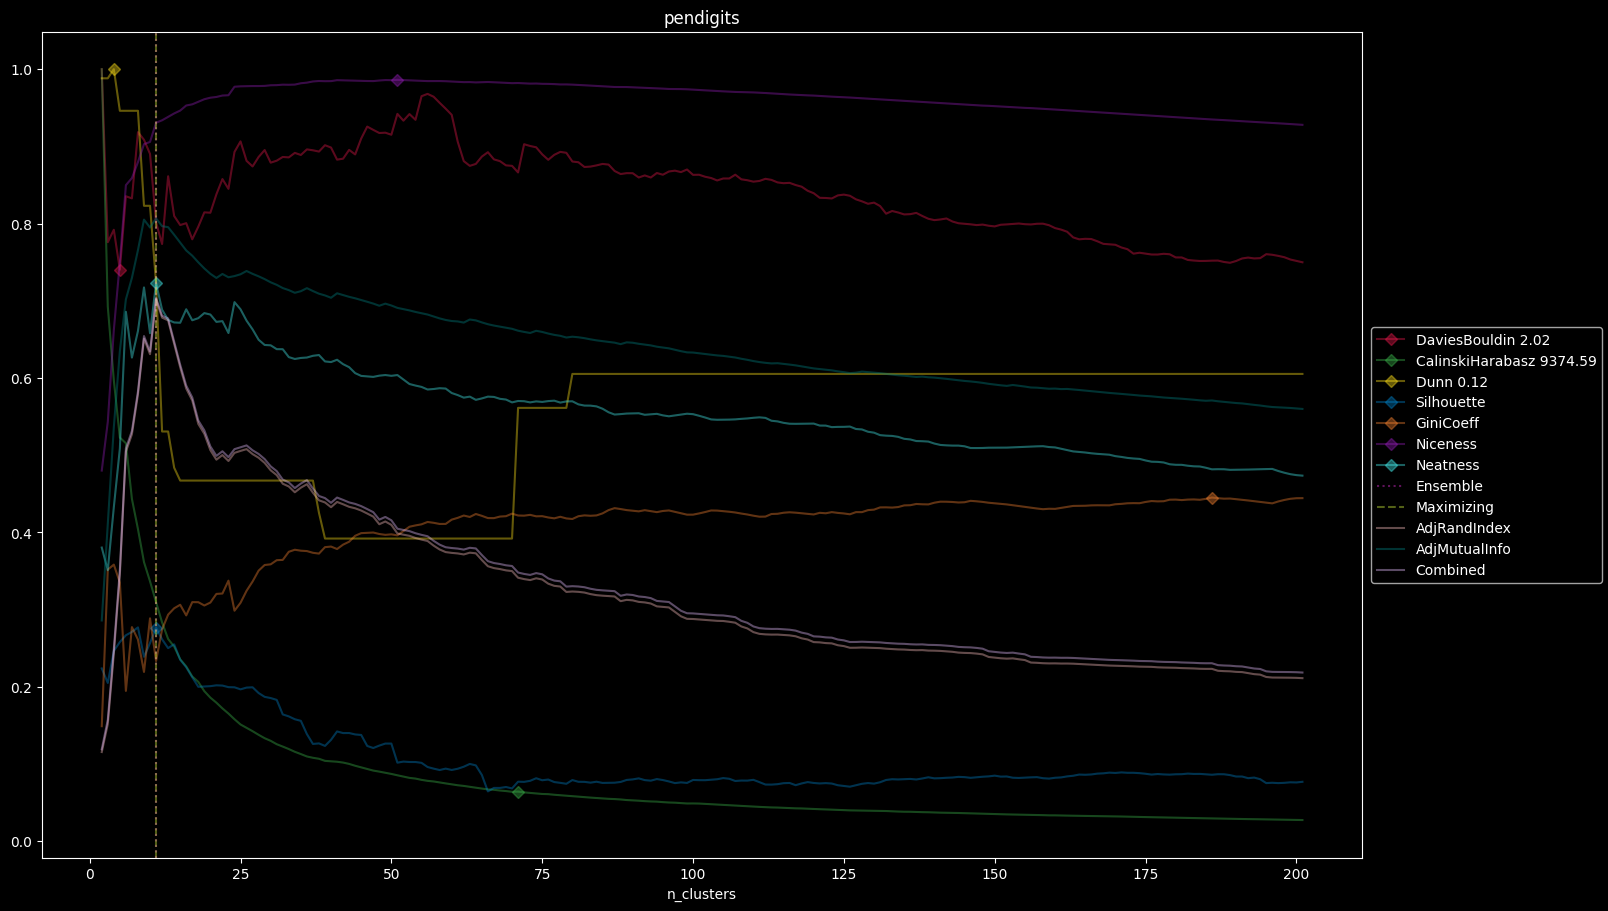

{'Silhouette': 0.2764020568672867, 'Niceness': 0.9306892023038109, 'GiniCoeff': 0.2335080636638414, 'Neatness': 0.7227636773800212, 'sample': {'n_clusters': 11}, 'counts_dict': {79: 1, 83: 1, 114: 1, 147: 1, 167: 1, 192: 1, 201: 2, 213: 1, 272: 1, 331: 1}, 'DaviesBouldin': 1.6170631680819227, 'CalinskiHarabasz': 2903.851880759067, 'Dunn': 0.08623853211009175, 'AdjRandIndex': 0.7015211435606499, 'AdjMutualInfo': 0.8068041370991843, 'Combined': 0.7037242287544346}
1    208
7    208
2    208
4    208
0    208
8    192
5    192
6    192
3    192
9    192
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.020925
Name: pendigits, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

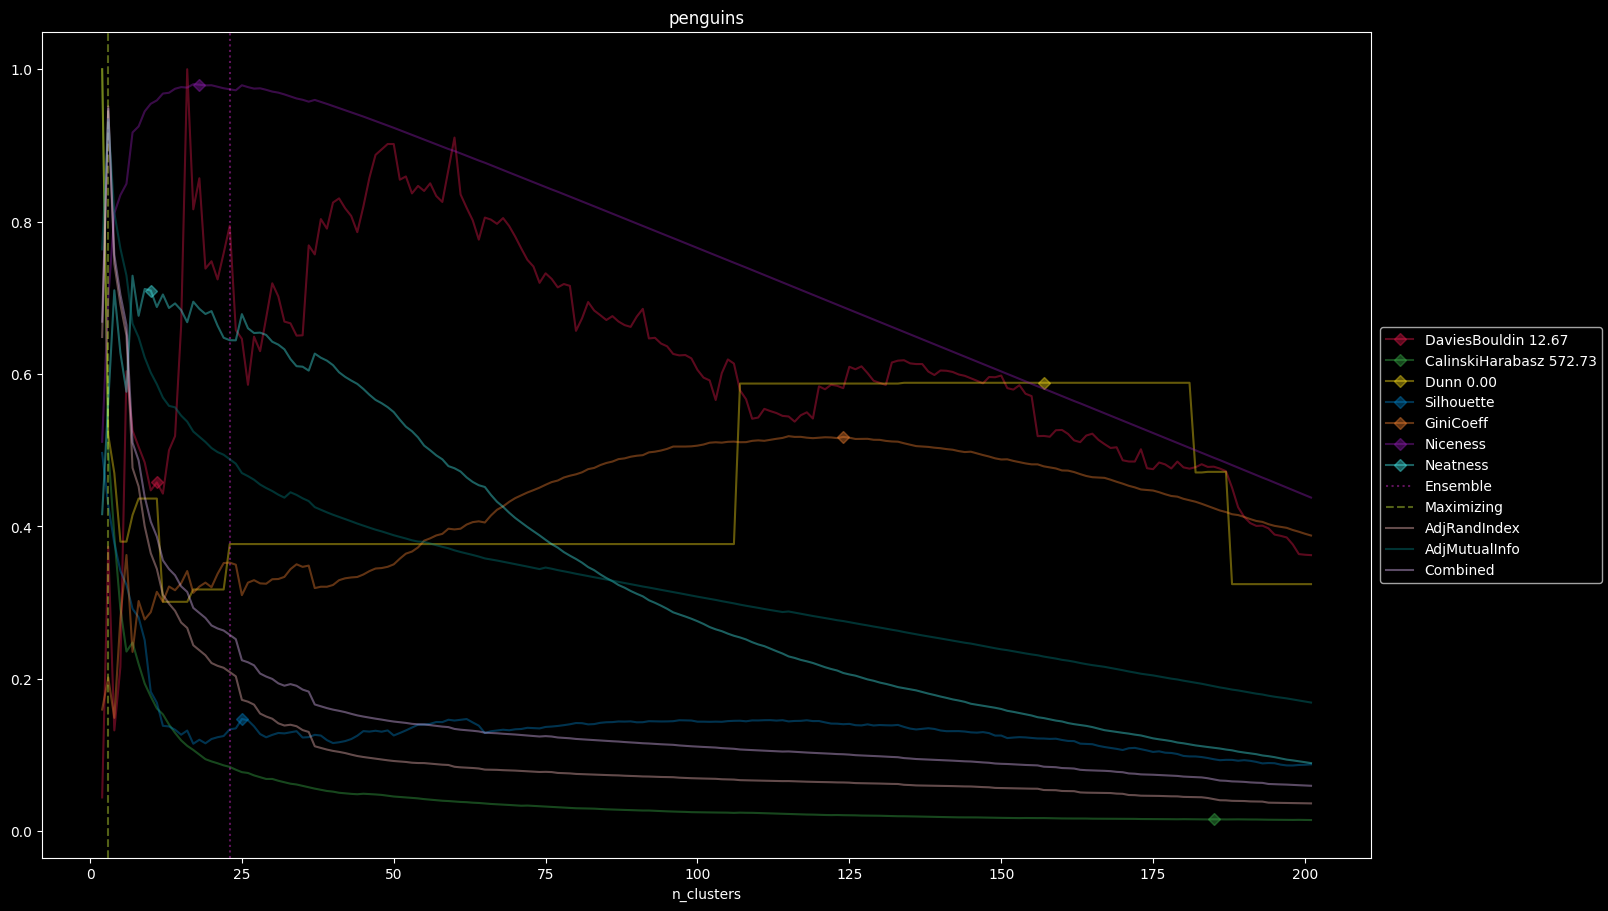

{'Silhouette': 0.42760656235063615, 'Niceness': 0.6980525681110075, 'GiniCoeff': 0.20168067226890757, 'Neatness': 0.5628256023859873, 'sample': {'n_clusters': 3}, 'counts_dict': {62: 1, 119: 1, 152: 1}, 'DaviesBouldin': 4.728694040675644, 'CalinskiHarabasz': 286.8565195985852, 'Dunn': 0.0021913190054782985, 'AdjRandIndex': 0.9512585706192984, 'AdjMutualInfo': 0.9342194798030019, 'Combined': 0.9482803093673743}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

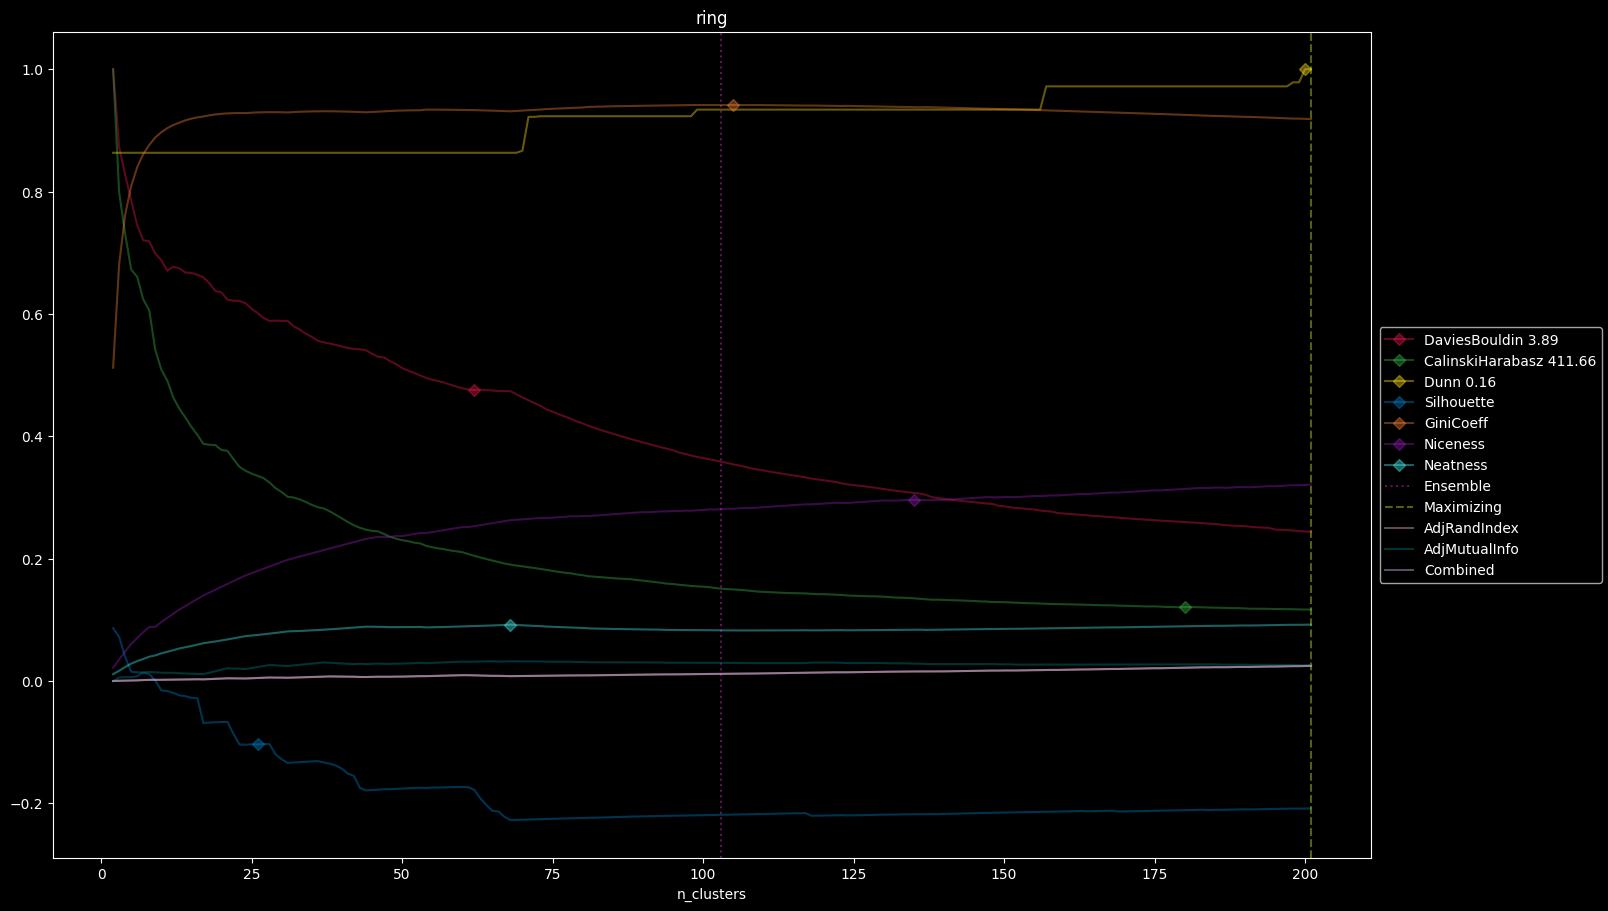

{'Silhouette': -0.20822811902199742, 'Niceness': 0.3210399073369839, 'GiniCoeff': 0.9184205686286078, 'Neatness': 0.09218085572919918, 'sample': {'n_clusters': 201}, 'counts_dict': {1: 136, 2: 25, 3: 14, 4: 9, 5: 4, 6: 5, 7: 2, 8: 1, 9: 1, 10: 1, 11: 2, 1623: 1}, 'DaviesBouldin': 0.9492919235932168, 'CalinskiHarabasz': 48.03822185518586, 'Dunn': 0.1608037239997643, 'AdjRandIndex': 0.02467616859375706, 'AdjMutualInfo': 0.025942425580557628, 'Combined': 0.024682792816543158}
1    1010
0     990
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005231
Name: ring, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

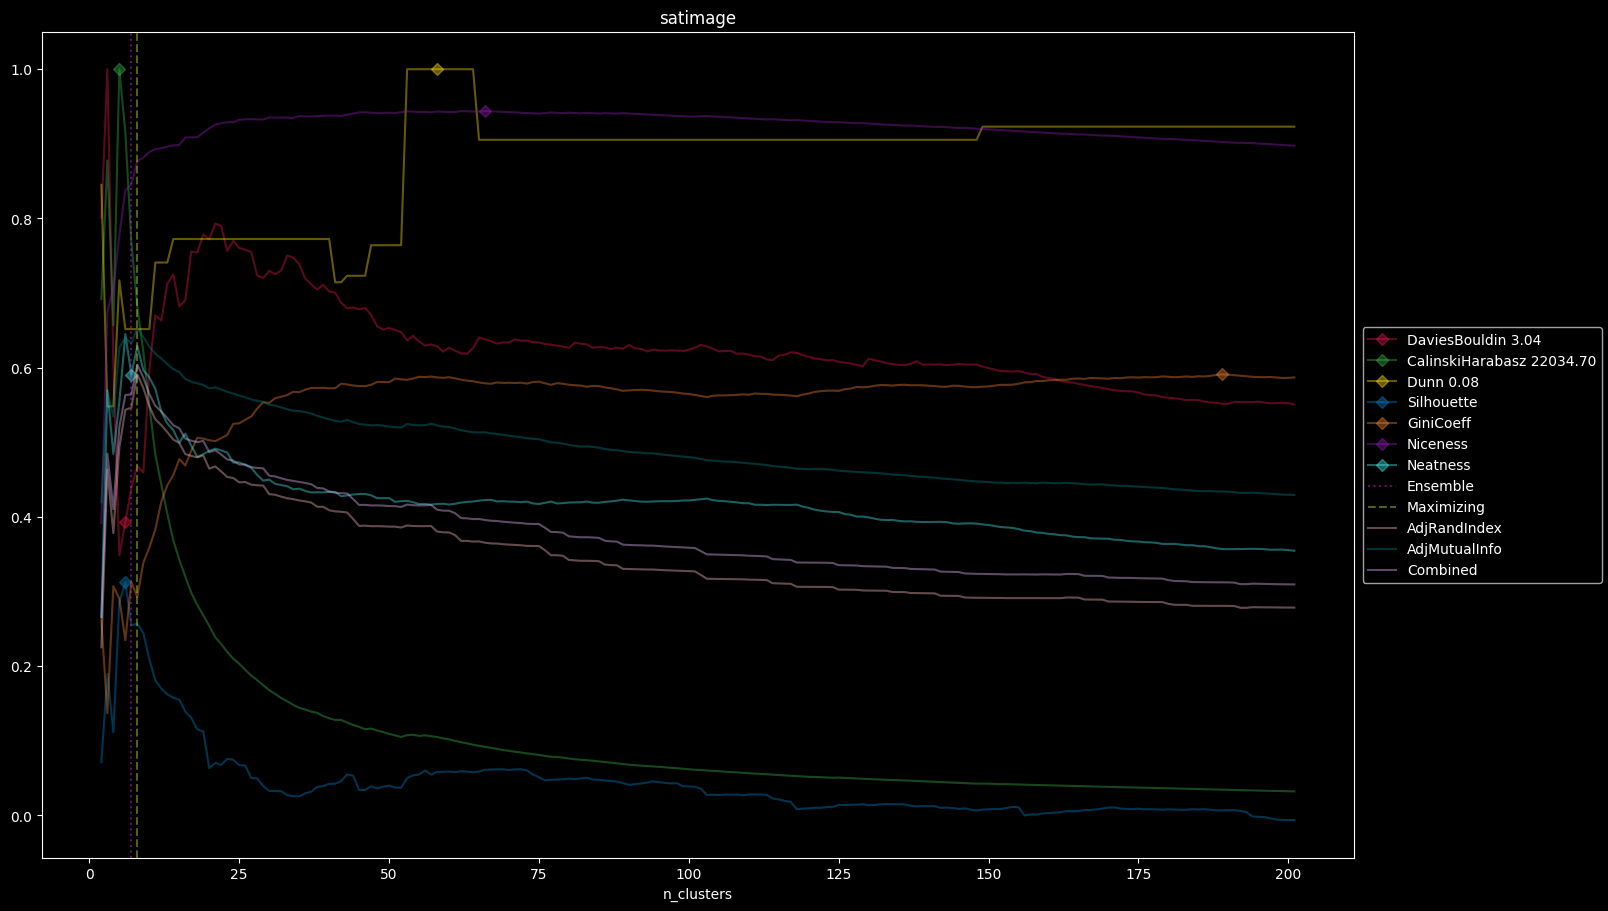

{'Silhouette': 0.2567996663250368, 'Niceness': 0.8766383397871923, 'GiniCoeff': 0.2928243431760056, 'Neatness': 0.6290445748682935, 'sample': {'n_clusters': 8}, 'counts_dict': {122: 1, 133: 1, 135: 1, 197: 1, 218: 1, 282: 1, 428: 1, 485: 1}, 'DaviesBouldin': 1.4230448143756365, 'CalinskiHarabasz': 15022.452201018568, 'Dunn': 0.05412719891745602, 'AdjRandIndex': 0.5911170002848398, 'AdjMutualInfo': 0.6528750720904534, 'Combined': 0.603824717919801}
1    476
7    469
3    422
5    220
2    218
4    195
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     36.000000
k      6.000000
e      1.721394
g      0.205766
Name: satimage, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

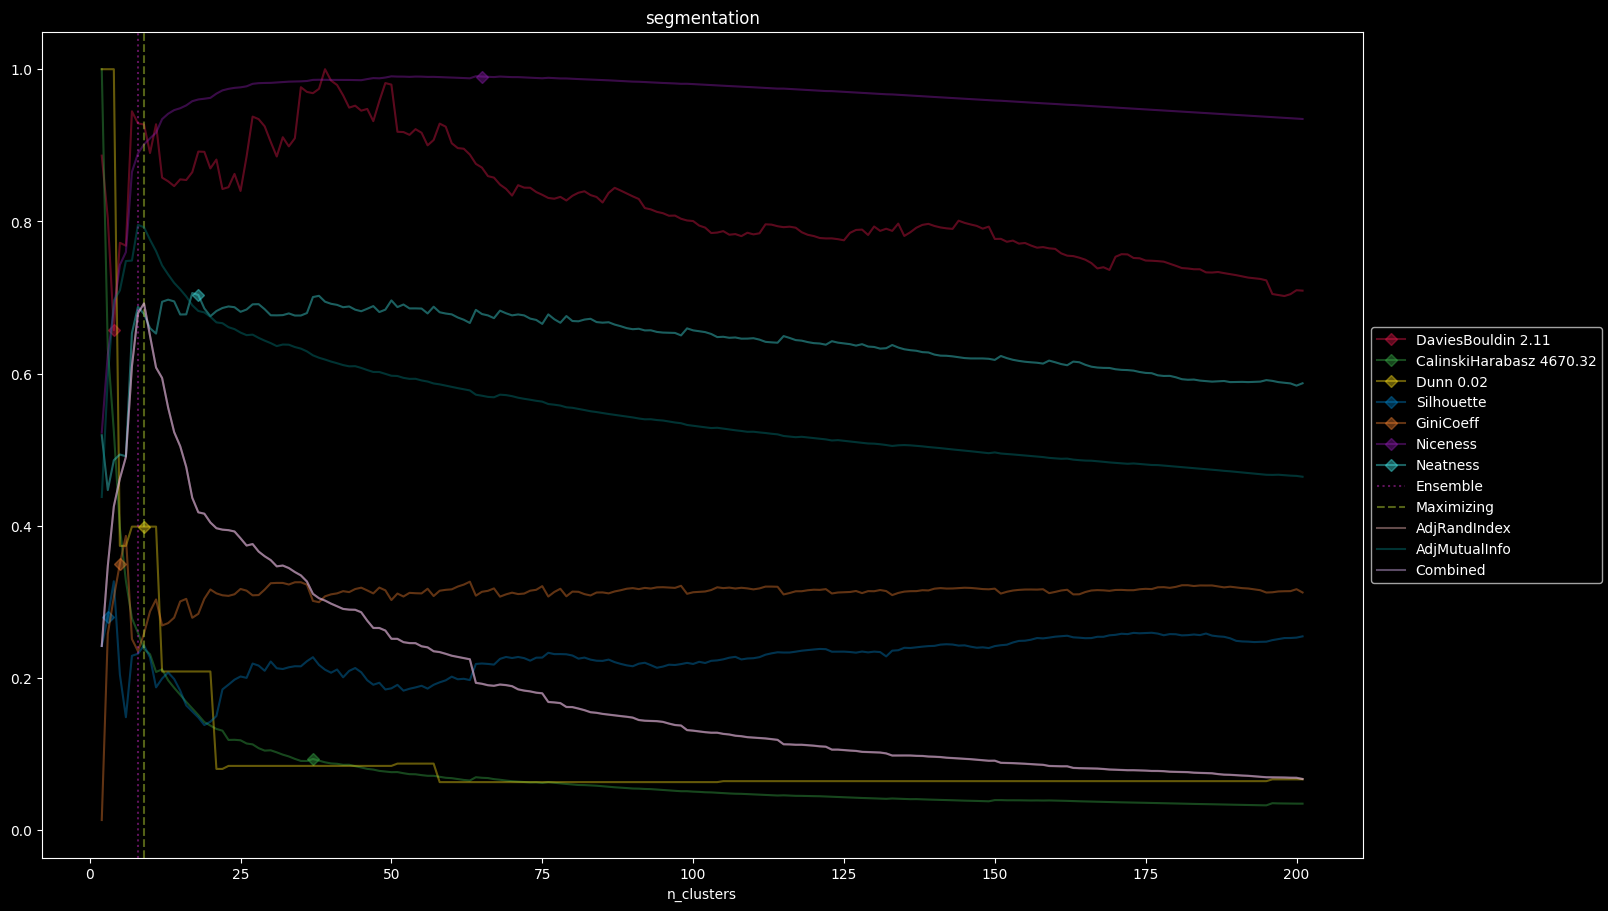

{'Silhouette': 0.2426154739726363, 'Niceness': 0.9011327592050457, 'GiniCoeff': 0.25807951639153687, 'Neatness': 0.6781584425182309, 'sample': {'n_clusters': 9}, 'counts_dict': {114: 1, 124: 1, 138: 1, 155: 1, 170: 1, 285: 1, 286: 1, 290: 1, 438: 1}, 'DaviesBouldin': 1.955089080230895, 'CalinskiHarabasz': 1111.0693758290133, 'Dunn': 0.007842382477204675, 'AdjRandIndex': 0.692072940030881, 'AdjMutualInfo': 0.7922541396793285, 'Combined': 0.6921478088983235}
5    286
6    286
3    286
2    286
4    286
1    285
0    285
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     19.000000
k      7.000000
e      1.945909
g      0.000747
Name: segmentation, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

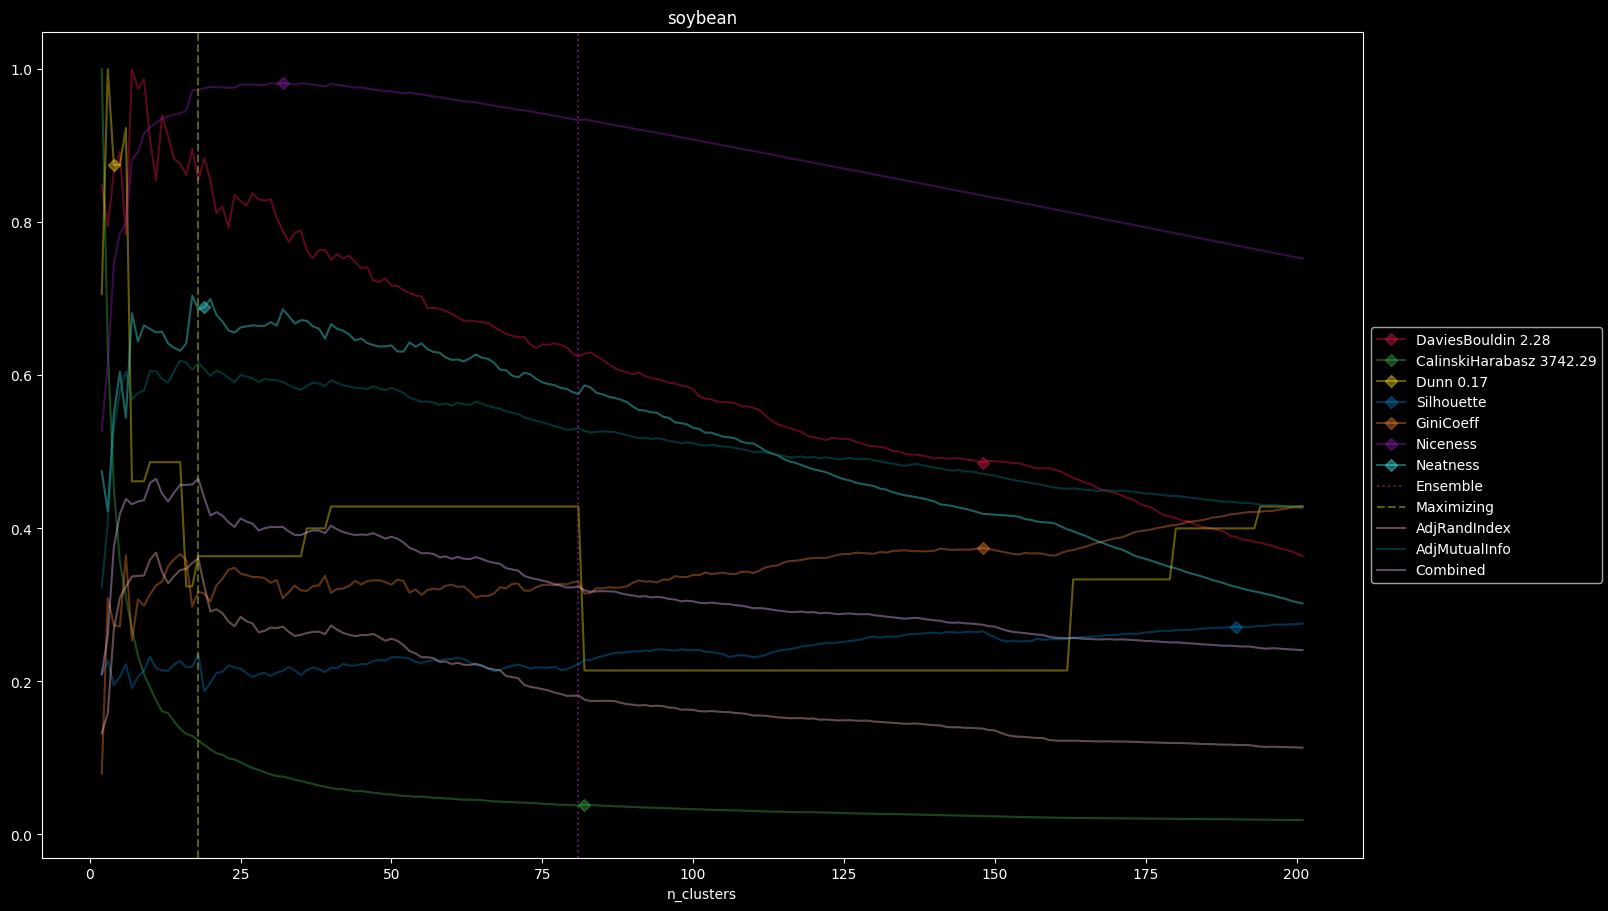

{'Silhouette': 0.23531859422130327, 'Niceness': 0.9730074361588721, 'GiniCoeff': 0.31719910974148263, 'Neatness': 0.6859845412275899, 'sample': {'n_clusters': 18}, 'counts_dict': {15: 1, 20: 3, 21: 1, 23: 1, 24: 1, 27: 1, 30: 1, 33: 1, 35: 1, 40: 1, 41: 1, 43: 1, 48: 1, 55: 1, 68: 1, 112: 1}, 'DaviesBouldin': 1.9490795536009644, 'CalinskiHarabasz': 460.45602596893406, 'Dunn': 0.06060606060606061, 'AdjRandIndex': 0.3604386032577869, 'AdjMutualInfo': 0.6167869360086998, 'Combined': 0.4648019111414302}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

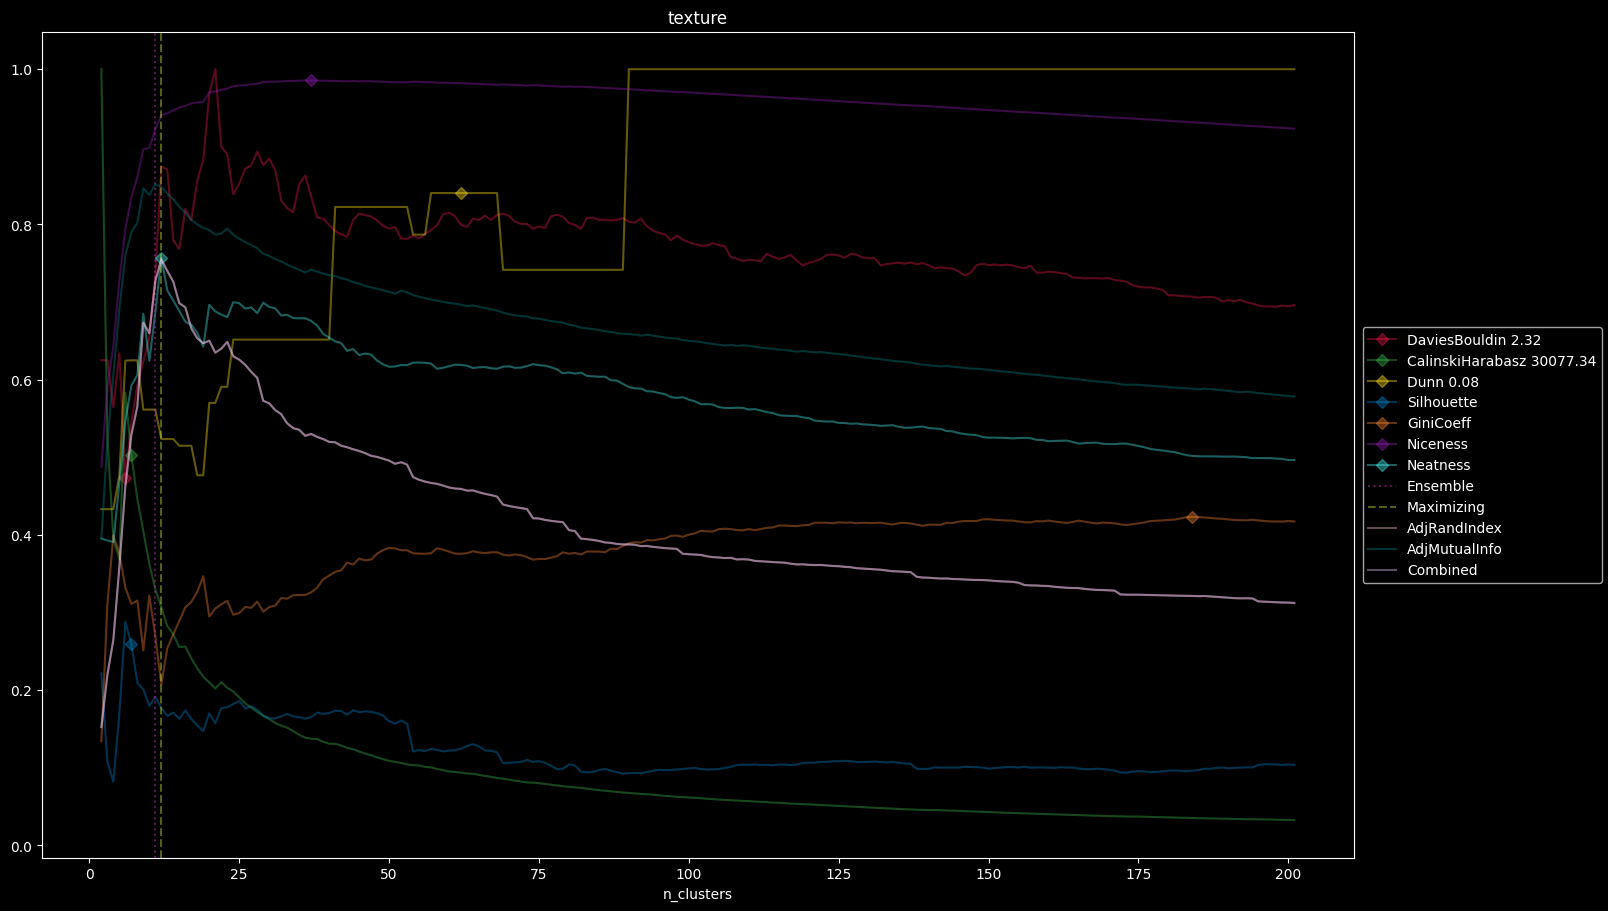

{'Silhouette': 0.17713168359987966, 'Niceness': 0.9407366599921098, 'GiniCoeff': 0.20707393629388515, 'Neatness': 0.7566450263738447, 'sample': {'n_clusters': 12}, 'counts_dict': {57: 1, 80: 1, 109: 1, 151: 1, 167: 1, 179: 1, 182: 2, 183: 1, 185: 1, 209: 1, 316: 1}, 'DaviesBouldin': 2.026167819525485, 'CalinskiHarabasz': 9234.164068728132, 'Dunn': 0.04173191070973382, 'AdjRandIndex': 0.7550780103559934, 'AdjMutualInfo': 0.8484439402231453, 'Combined': 0.7551579351125959}
6     182
13    182
12    182
4     182
9     182
7     182
3     182
10    182
14    182
8     181
2     181
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     40.000000
k     11.000000
e      2.397893
g      0.000856
Name: texture, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

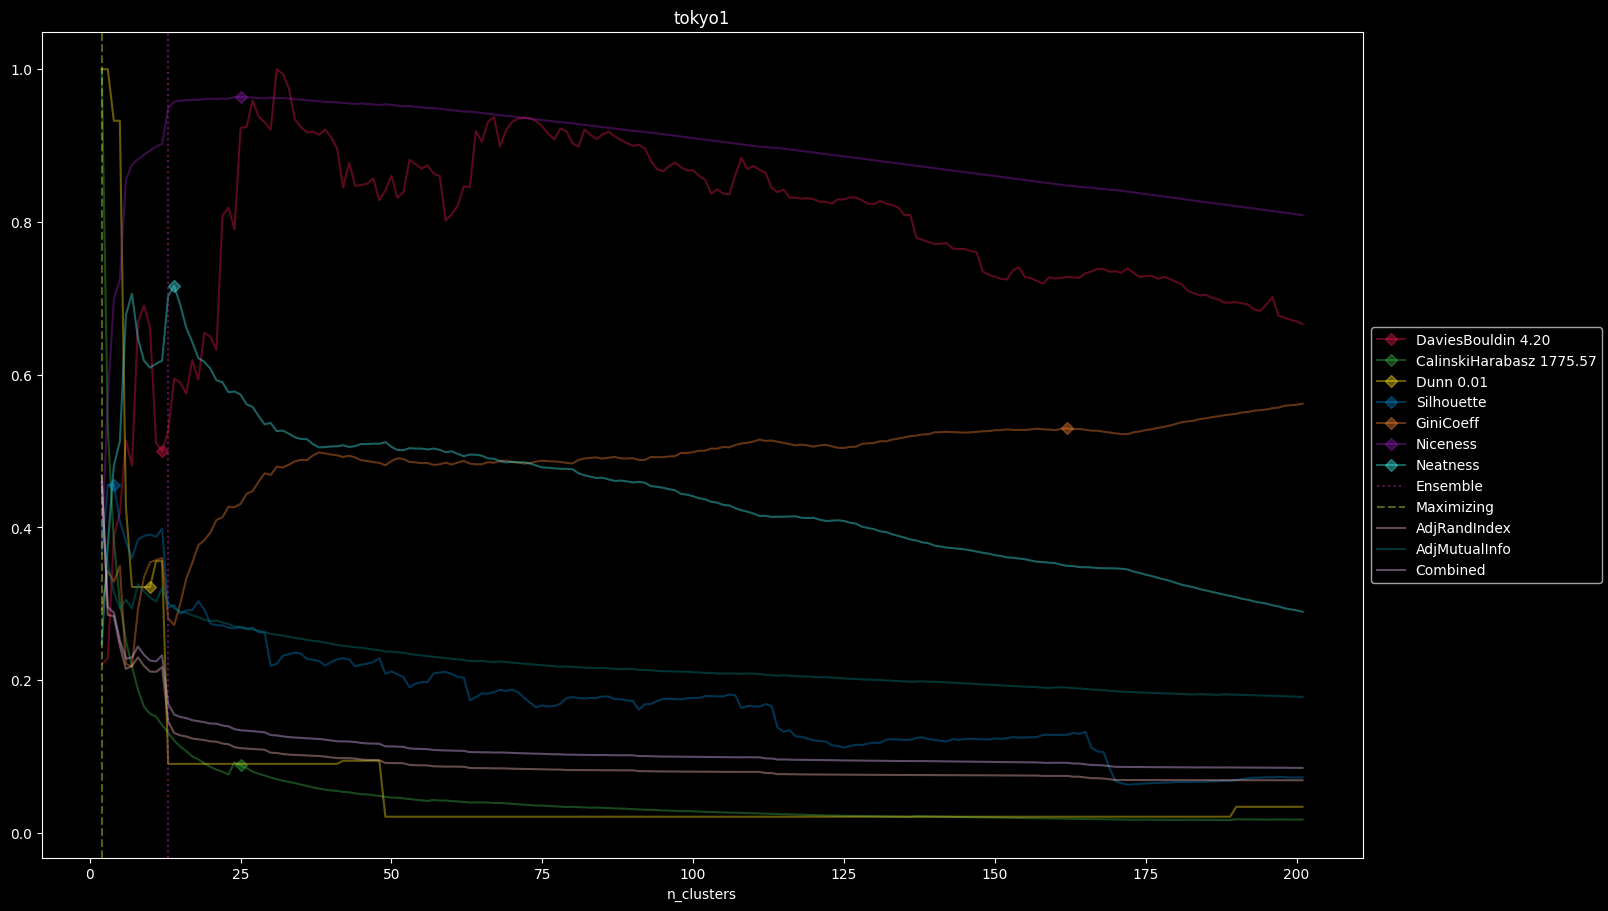

{'Silhouette': 0.3655824173784937, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.2472083968844234, 'sample': {'n_clusters': 2}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 0.9261763047647377, 'CalinskiHarabasz': 1775.5737180879953, 'Dunn': 0.0055406102355809485, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/200 [00:00<?, ?it/s]

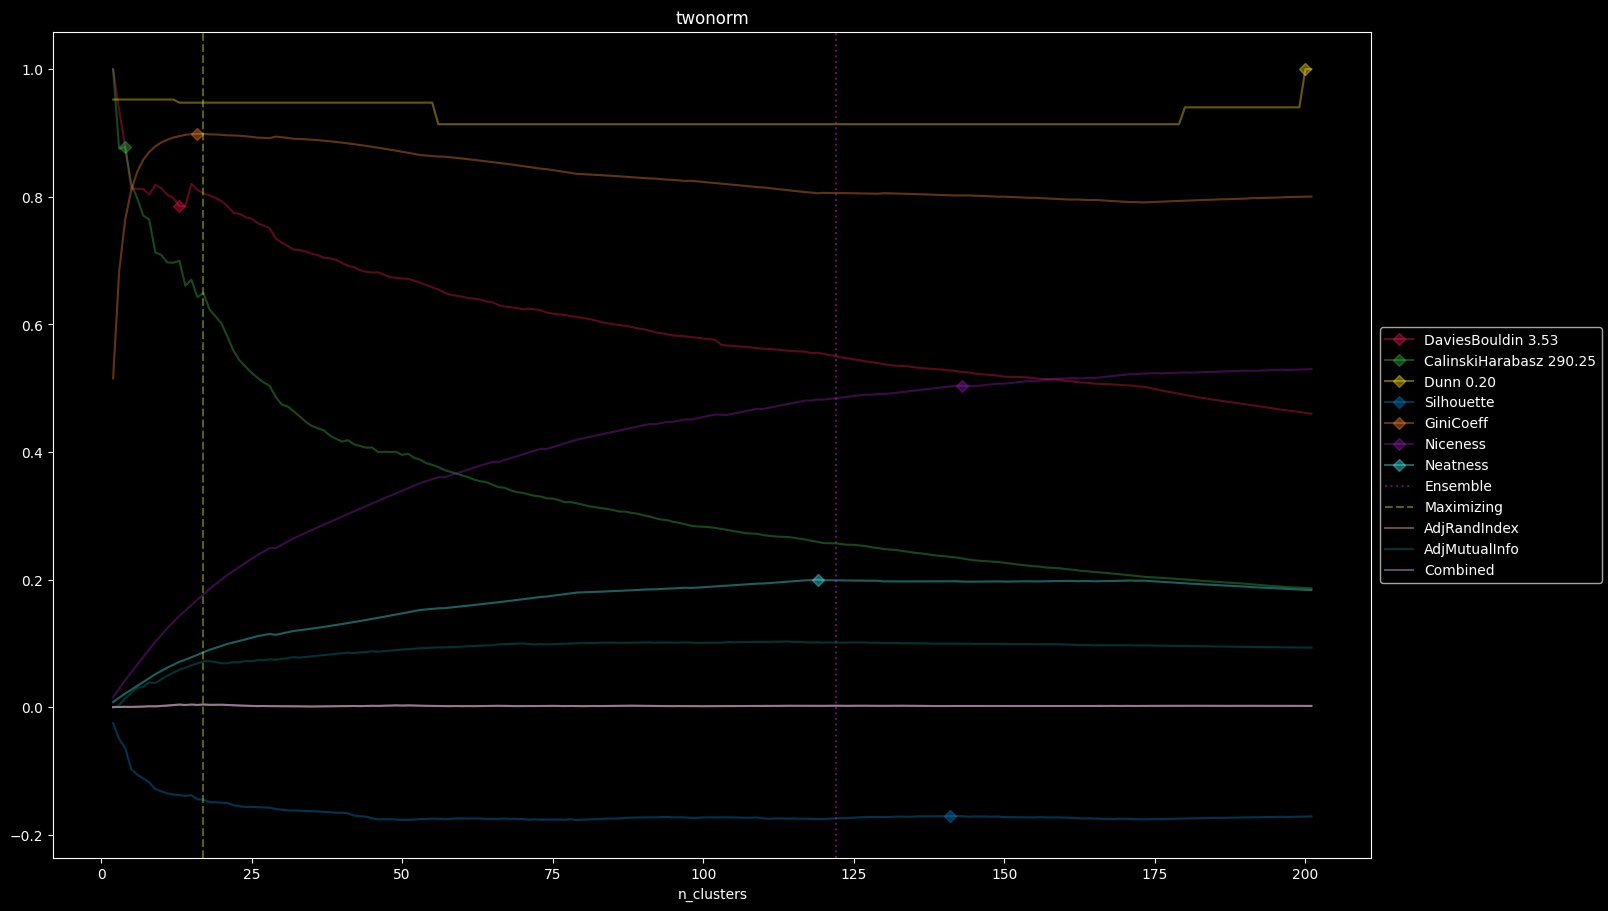

{'Silhouette': -0.14518026471882986, 'Niceness': 0.1768496039307366, 'GiniCoeff': 0.8984982972496136, 'Neatness': 0.08579209692225559, 'sample': {'n_clusters': 17}, 'counts_dict': {9: 4, 10: 2, 11: 2, 12: 5, 13: 2, 15: 1, 1821: 1}, 'DaviesBouldin': 2.8429083245224867, 'CalinskiHarabasz': 188.4960261532715, 'Dunn': 0.1934835168177118, 'AdjRandIndex': 0.0040374696464102995, 'AdjMutualInfo': 0.07179577060350283, 'Combined': 0.004072916327915404}
0    1001
1     999
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000523
Name: twonorm, dtype: float64


  0%|          | 0/177 [00:00<?, ?it/s]

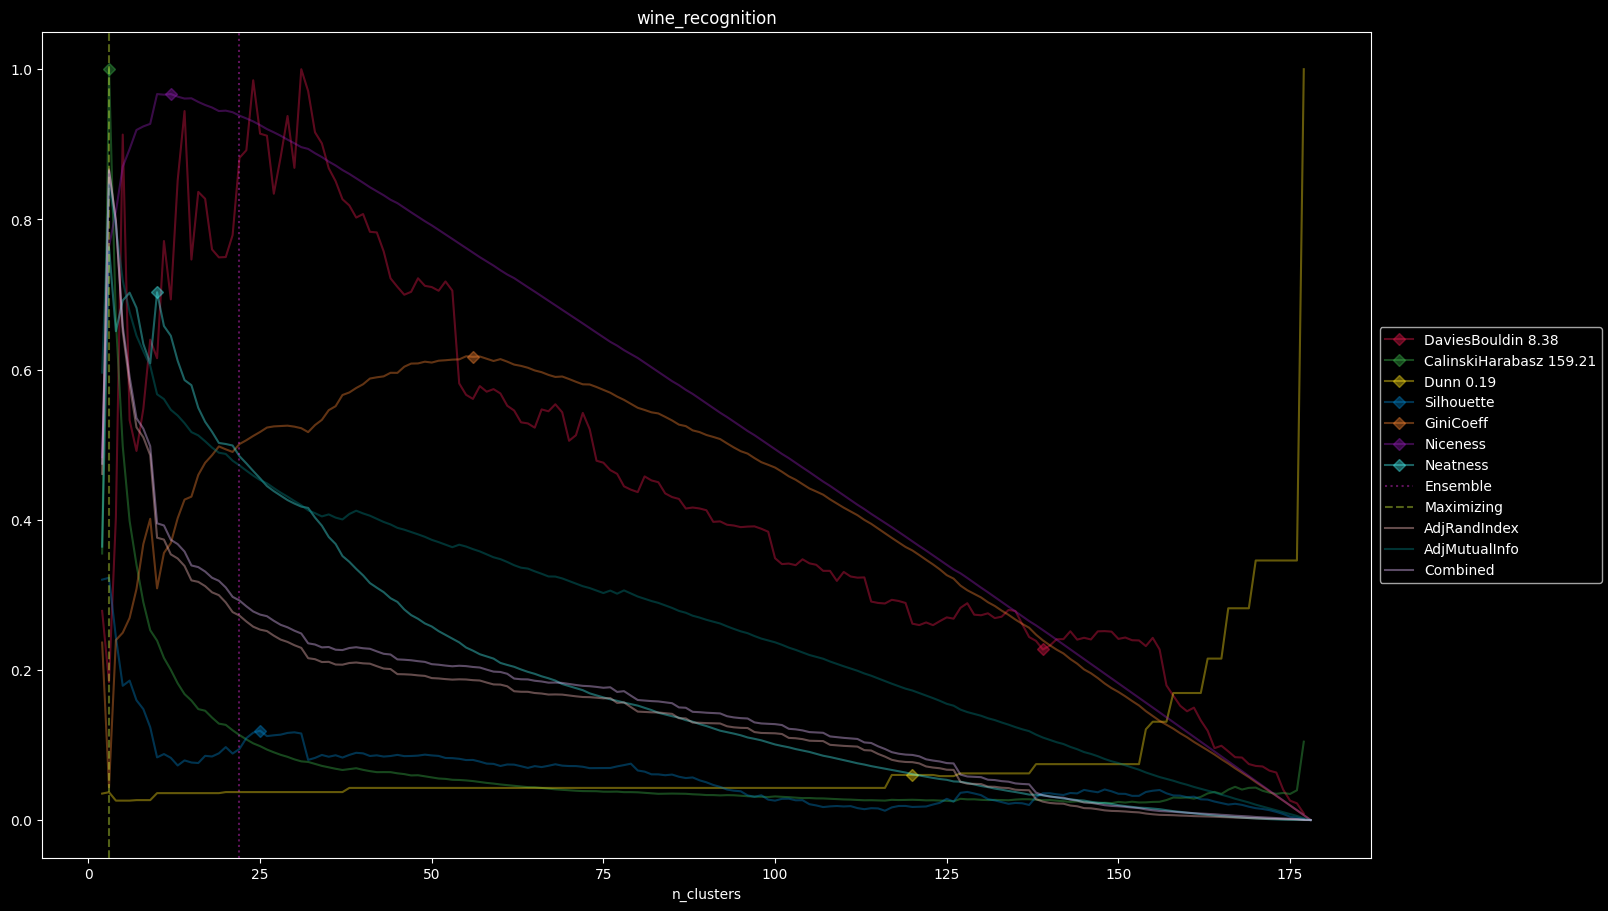

{'Silhouette': 0.32266342592116976, 'Niceness': 0.7638655740830546, 'GiniCoeff': 0.04377104377104377, 'Neatness': 0.7629705455875533, 'sample': {'n_clusters': 3}, 'counts_dict': {53: 1, 62: 1, 63: 1}, 'DaviesBouldin': 1.5393519266722695, 'CalinskiHarabasz': 159.2141680688374, 'Dunn': 0.006991078549015807, 'AdjRandIndex': 0.8665957604928709, 'AdjMutualInfo': 0.8468259136178008, 'Combined': 0.8646054627771652}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 2000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6618069833416458
Average Rand Index: 0.6073378028843733
Average Combined: 0.6138725189836102


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.433927      0.270032  0.290221
CalinskiHarabasz       0.435677      0.271291  0.292794
Dunn                   0.455716      0.308921  0.326559
Silhouette             0.520929      0.367158  0.390939
GiniCoeff              0.398789      0.216114  0.237088
Niceness               0.498461      0.302087  0.329430
Neatness               0.580983      0.456521  0.478889
Elbow                  0.000000      0.000000  0.000000
Ensemble               0.528139      0.381946  0.406150

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.290221          0.292794  0.326559    0.390939   
std     0.000000       0.224574          0.242868  0.227462    0.272427   
min     0.000000       0.003937          0.000403  0.001767    0.001822   
25%     0.000000       0.101445          0.093715  0.086192    0.207760   
50%     0.000000       0.298491          0.228251  0.360228    0.371454   
75%     0.000000       0.396346          0.450836  0.490727    0.572578   
max     0.000000       0.916224          0.916224  0.784028    0.916224   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     0.237088  0.329430  0.478889  0.000000  0.406150 1225.142857   
std      0.126727  0.173488  0.256361  0.000000  0.259976  810.794430   
min      0.003333  0.001730  0.001940  0.000000  0.002121   72.000000   
25%      0.122286  0.225742  0.330211  0.000000  0.180766  417.750000   
50%      0.240356  0.366694  0.461844  0.000000  0.359788 1479.500000   
75%      0.324984  0.461526  0.678121  0.000000  0.595139 2000.000000   
max      0.461840  0.638514  0.900927  0.000000  0.900927 2000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543482  0.143445  
std     56.517486  4.307462  0.716043  0.193266  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000392  
50%     22.500000  6.000000  1.545430  0.060799  
75%     41.750000 10.000000  2.302585  0.222515  
max    240.000000 18.000000  2.625593  0.817516

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz     Dunn  Silhouette  \
Metric                                                                        
BIC               NaN            NaN               NaN      NaN         NaN   
DaviesBouldin     NaN       1.000000          0.614187 0.759849    0.670464   
CalinskiHarabasz  NaN       0.614187          1.000000 0.567218    0.488691   
Dunn              NaN       0.759849          0.567218 1.000000    0.673518   
Silhouette        NaN       0.670464          0.488691 0.673518    1.000000   
GiniCoeff         NaN       0.651055          0.509006 0.719478    0.742040   
Niceness          NaN       0.543579          0.475479 0.526616    0.836672   
Neatness          NaN       0.614551          0.470153 0.614863    0.852782   
Elbow             NaN            NaN               NaN      NaN         NaN   
Ensemble          NaN       0.765337          0.608099 0.813207    0.852227   
n                 NaN       0.322660          0.113043 0.344411    0.222474   
d                 NaN       0.277385          0.108445 0.467980    0.338424   
k                 NaN       0.391101          0.270063 0.435170    0.460577   
e                 NaN       0.367005          0.294737 0.481303    0.564818   
g                 NaN       0.295705          0.177330 0.094876    0.049597   

Metric            GiniCoeff  Niceness  Neatness  Elbow  Ensemble         n  \
Metric                                                                       
BIC                     NaN       NaN       NaN    NaN       NaN       NaN   
DaviesBouldin      0.651055  0.543579  0.614551    NaN  0.765337  0.322660   
CalinskiHarabasz   0.509006  0.475479  0.470153    NaN  0.608099  0.113043   
Dunn               0.719478  0.526616  0.614863    NaN  0.813207  0.344411   
Silhouette         0.742040  0.836672  0.852782    NaN  0.852227  0.222474   
GiniCoeff          1.000000  0.778906  0.754800    NaN  0.824529  0.323689   
Niceness           0.778906  1.000000  0.896233    NaN  0.748796  0.015783   
Neatness           0.754800  0.896233  1.000000    NaN  0.847486  0.149553   
Elbow                   NaN       NaN       NaN    NaN       NaN       NaN   
Ensemble           0.824529  0.748796  0.847486    NaN  1.000000  0.417664   
n                  0.323689  0.015783  0.149553    NaN  0.417664  1.000000   
d                  0.390844  0.376672  0.442511    NaN  0.425094  0.405125   
k                  0.627764  0.619934  0.550110    NaN  0.543386  0.337582   
e                  0.671352  0.666953  0.661385    NaN  0.674574  0.354914   
g                  0.093081  0.160782 -0.015845    NaN -0.050740 -0.310765   

Metric                   d        k         e         g  
Metric                                                   
BIC                    NaN      NaN       NaN       NaN  
DaviesBouldin     0.277385 0.391101  0.367005  0.295705  
CalinskiHarabasz  0.108445 0.270063  0.294737  0.177330  
Dunn              0.467980 0.435170  0.481303  0.094876  
Silhouette        0.338424 0.460577  0.564818  0.049597  
GiniCoeff         0.390844 0.627764  0.671352  0.093081  
Niceness          0.376672 0.619934  0.666953  0.160782  
Neatness          0.442511 0.550110  0.661385 -0.015845  
Elbow                  NaN      NaN       NaN       NaN  
Ensemble          0.425094 0.543386  0.674574 -0.050740  
n                 0.405125 0.337582  0.354914 -0.310765  
d                 1.000000 0.337486  0.395907 -0.185876  
k                 0.337486 1.000000  0.893365  0.153414  
e                 0.395907 0.893365  1.000000 -0.188385  
g                -0.185876 0.153414 -0.188385  1.000000

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.869828 0.407934   
CalinskiHarabasz 0.000000       0.869828          1.000000 0.436348   
Dunn             0.000000       0.407934          0.436348 1.000000   
Silhouette       0.000000       0.168647          0.146979 0.455908   
GiniCoeff        0.000000       0.403299          0.812184 0.156348   
Niceness         0.000000       0.283120          0.251341 0.902185   
Neatness         0.000000       0.006364          0.007379 0.028101   
Elbow            1.000000       0.000000          0.000000 0.000000   
Ensemble         0.000000       0.104734          0.070180 0.222154   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
DaviesBouldin       0.168647   0.403299  0.283120  0.006364 0.000000  0.104734  
CalinskiHarabasz    0.146979   0.812184  0.251341  0.007379 0.000000  0.070180  
Dunn                0.455908   0.156348  0.902185  0.028101 0.000000  0.222154  
Silhouette          1.000000   0.035230  0.583034  0.158735 0.000000  0.793165  
GiniCoeff           0.035230   1.000000  0.027522  0.000159 0.000000  0.020856  
Niceness            0.583034   0.027522  1.000000  0.017112 0.000000  0.283120  
Neatness            0.158735   0.000159  0.017112  1.000000 0.000000  0.305718  
Elbow               0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
Ensemble            0.793165   0.020856  0.283120  0.305718 0.000000  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    9.500000      9.500000  9.500000
DaviesBouldin          5.142857      5.142857  5.142857
CalinskiHarabasz       5.500000      5.464286  5.464286
Dunn                   4.839286      4.625000  4.625000
Silhouette             3.946429      4.160714  4.160714
GiniCoeff              6.178571      6.071429  6.071429
Niceness               4.767857      4.696429  4.696429
Neatness               2.392857      2.357143  2.357143
Elbow                  9.500000      9.500000  9.500000
Ensemble               3.232143      3.482143  3.482143

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    9.500000       5.142857          5.464286  4.625000    4.160714   
std     0.000000       2.391564          2.268662  2.255138    2.396191   
min     9.500000       1.000000          1.000000  1.000000    1.000000   
25%     9.500000       2.875000          4.000000  3.000000    2.000000   
50%     9.500000       6.000000          6.000000  6.000000    3.250000   
75%     9.500000       7.000000          7.125000  7.000000    5.250000   
max     9.500000       8.000000          8.000000  7.000000    8.000000   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     6.071429  4.696429  2.357143  9.500000  3.482143 1225.142857   
std      1.918305  1.862591  1.725930  0.000000  1.126138  810.794430   
min      1.000000  2.000000  1.000000  9.500000  1.000000   72.000000   
25%      5.000000  3.000000  1.000000  9.500000  2.750000  417.750000   
50%      6.250000  5.000000  1.750000  9.500000  4.000000 1479.500000   
75%      8.000000  6.000000  3.250000  9.500000  4.000000 2000.000000   
max      8.000000  8.000000  7.000000  9.500000  5.000000 2000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543482  0.143445  
std     56.517486  4.307462  0.716043  0.193266  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000392  
50%     22.500000  6.000000  1.545430  0.060799  
75%     41.750000 10.000000  2.302585  0.222515  
max    240.000000 18.000000  2.625593  0.817516

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000         -0.084353 -0.154513   -0.057474   
CalinskiHarabasz  NaN      -0.084353          1.000000  0.085966   -0.349780   
Dunn              NaN      -0.154513          0.085966  1.000000   -0.218042   
Silhouette        NaN      -0.057474         -0.349780 -0.218042    1.000000   
GiniCoeff         NaN      -0.121384         -0.148324  0.057790   -0.490065   
Niceness          NaN      -0.467988         -0.099075 -0.385215   -0.175379   
Neatness          NaN      -0.423327         -0.389168 -0.428206    0.142329   
Elbow             NaN            NaN               NaN       NaN         NaN   
Ensemble          NaN       0.107559         -0.250330 -0.188678    0.042279   
n                 NaN      -0.239473         -0.007991 -0.152061    0.097260   
d                 NaN       0.092147          0.105196 -0.158408   -0.046439   
k                 NaN       0.182846          0.096782  0.105328   -0.125271   
e                 NaN       0.288288          0.103727  0.117360   -0.231568   
g                 NaN      -0.166065         -0.009639  0.115347   -0.098331   

Metric            GiniCoeff  Niceness  Neatness  Elbow  Ensemble         n  \
Metric                                                                       
BIC                     NaN       NaN       NaN    NaN       NaN       NaN   
DaviesBouldin     -0.121384 -0.467988 -0.423327    NaN  0.107559 -0.239473   
CalinskiHarabasz  -0.148324 -0.099075 -0.389168    NaN -0.250330 -0.007991   
Dunn               0.057790 -0.385215 -0.428206    NaN -0.188678 -0.152061   
Silhouette        -0.490065 -0.175379  0.142329    NaN  0.042279  0.097260   
GiniCoeff          1.000000  0.063305 -0.125449    NaN -0.132258 -0.008508   
Niceness           0.063305  1.000000  0.507342    NaN -0.201326  0.453054   
Neatness          -0.125449  0.507342  1.000000    NaN  0.079625  0.300030   
Elbow                   NaN       NaN       NaN    NaN       NaN       NaN   
Ensemble          -0.132258 -0.201326  0.079625    NaN  1.000000 -0.572447   
n                 -0.008508  0.453054  0.300030    NaN -0.572447  1.000000   
d                  0.208092  0.118750 -0.151795    NaN -0.309819  0.405125   
k                  0.308956 -0.131318 -0.345528    NaN -0.307182  0.337582   
e                  0.295306 -0.037204 -0.349021    NaN -0.470071  0.354914   
g                  0.285948 -0.105245 -0.198616    NaN  0.341707 -0.310765   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin     0.092147  0.182846  0.288288 -0.166065  
CalinskiHarabasz  0.105196  0.096782  0.103727 -0.009639  
Dunn             -0.158408  0.105328  0.117360  0.115347  
Silhouette       -0.046439 -0.125271 -0.231568 -0.098331  
GiniCoeff         0.208092  0.308956  0.295306  0.285948  
Niceness          0.118750 -0.131318 -0.037204 -0.105245  
Neatness         -0.151795 -0.345528 -0.349021 -0.198616  
Elbow                  NaN       NaN       NaN       NaN  
Ensemble         -0.309819 -0.307182 -0.470071  0.341707  
n                 0.405125  0.337582  0.354914 -0.310765  
d                 1.000000  0.337486  0.395907 -0.185876  
k                 0.337486  1.000000  0.893365  0.153414  
e                 0.395907  0.893365  1.000000 -0.188385  
g                -0.185876  0.153414 -0.188385  1.000000

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.643644 0.349237   
CalinskiHarabasz 0.000000       0.643644          1.000000 0.142501   
Dunn             0.000000       0.349237          0.142501 1.000000   
Silhouette       0.000000       0.161649          0.057043 0.503330   
GiniCoeff        0.000000       0.166070          0.352288 0.013447   
Niceness         0.000000       0.385570          0.141346 0.887393   
Neatness         0.000000       0.000020          0.000006 0.000308   
Elbow            1.000000       0.000000          0.000000 0.000000   
Ensemble         0.000000       0.005356          0.000307 0.055747   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
DaviesBouldin       0.161649   0.166070  0.385570  0.000020 0.000000  0.005356  
CalinskiHarabasz    0.057043   0.352288  0.141346  0.000006 0.000000  0.000307  
Dunn                0.503330   0.013447  0.887393  0.000308 0.000000  0.055747  
Silhouette          1.000000   0.004213  0.212864  0.000707 0.000000  0.593818  
GiniCoeff           0.004213   1.000000  0.007278  0.000000 0.000000  0.000001  
Niceness            0.212864   0.007278  1.000000  0.000009 0.000000  0.016174  
Neatness            0.000707   0.000000  0.000009  1.000000 0.000000  0.004214  
Elbow               0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
Ensemble            0.593818   0.000001  0.016174  0.004214 0.000000  1.000000